# 1) Basic User Input

This section imports the required packages and contains user input which shuld be reviewed every time the pipeline is used. 

In [1]:
import os
import pandas as pd
import sys
%matplotlib inline

Usually, this filepath must be adusted only once to specify where the .py file with all functions is stored.

In [2]:
# load custom functions
sys.path.insert(0, '/Users/timnoahkempchen/Desktop/SAP/Functions_grouped')


#from  Helper_functions import *
#from  Baseline_visualization import *
#from  Neighborhood_Community_analysis import *
#from  Analysis_dependent_on_CNs import *
from  All_functions import *

### Session Info

In [3]:
import session_info
session_info.show()

## 1.1) Filepaths 

Specify where the input dataframe (df) is stored as well as a path to store all output. 

The input data frame has to fullfill some minimal requirements: 
Data must be stored as pandas df (every row represents a cell)
1. The df must contain a __Sample ID__ for every cell
2. The df must contain one column each for __x__ and __y__ coordinates 
3. The df must contain one column specifying the __Cell Type__
4. The df must contain one column indicating the __Unique Region__ in which the cell was recorded 
5. The df should contain one column with an experimental condition or other type of __comparison__ 

In [6]:
input_file = "/Users/timnoahkempchen/Library/Mobile Documents/com~apple~CloudDocs/Uni/Master/Semester 3/Praktikum Nolan Lab/Python_pipeline_nolan_lab/Datasets/Confidential/22_04_08_ST_CODEX_CellClustered_JH/22_04_08_ST_CODEX_CellClustered_JH.csv"

output_dir = "/Users/timnoahkempchen/Library/Mobile Documents/com~apple~CloudDocs/Uni/Master/Semester 3/Praktikum Nolan Lab/Python_pipeline_nolan_lab/Datasets/Confidential/22_04_08_ST_CODEX_CellClustered_JH/Results/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## 1.2) Reading the data

In [7]:
df = pd.read_csv(input_file)

In [19]:
df.columns

Index(['Unnamed: 0', 'CD5', 'FOXP3', 'NK11', 'CD19', 'H2Db', 'TCF7', 'Ly6G',
       'PD1', 'TRYP1', 'NKp46', 'H2Kb', 'CD90', 'Tim3', 'PDL1', 'CD11b',
       'NKG2A', 'CD25', 'CD71', 'CD3', 'B220', 'CD11c', 'F480', 'Sca1', 'CD4',
       'Ly6C', 'CD27', 'MHCII', 'CD44', 'CD106', '1632', 'TCRb', 'Ki67',
       'KLRG1', 'CD8', 'keratin8', 'CD169', 'CD31', 'CD45', 'x', 'y',
       'region_num', 'Sample', 'region', 'CD86', 'TCRgd', 'CD117',
       'Podoplanin', 'CD69', 'IgM', 'CD49b', 'Thy11', 'IgD', 'CD79b',
       'Cell Type', 'Xcorr', 'Ycorr', 'array', 'unique_region'],
      dtype='object')

In [18]:
df["unique_region"] = df['Sample'] + "_" + df['region_num']

# 2) Basic Visualization & Analysis 

## 2.1) Color dictionary generator

Original key list is : ['CD8+ T cell' 'Neutrophil' 'Tumor' 'Macrophage' 'CD169+ Macrophage'
 'CD8+ T cell PD1+' 'DC' 'Endothelial' 'Treg' 'CD4+ T cell' 'NK'
 'Lymphatic' 'PDL1+ Tumor' 'Ki67+ Tumor' 'TYRP1+ Tumor' 'B']
Original value list is : ['#CEBABA', '#036F3B', '#E2CC5E', '#A087CD', '#9D291C', '#04F87D', '#691BEA', '#CBFCA1', '#1504A7', '#751F40', '#02CDFD', '#EC1757', '#835F14', '#CBE30C', '#21E623', '#ACA054']
Resultant dictionary is : {'CD8+ T cell': '#CEBABA', 'Neutrophil': '#036F3B', 'Tumor': '#E2CC5E', 'Macrophage': '#A087CD', 'CD169+ Macrophage': '#9D291C', 'CD8+ T cell PD1+': '#04F87D', 'DC': '#691BEA', 'Endothelial': '#CBFCA1', 'Treg': '#1504A7', 'CD4+ T cell': '#751F40', 'NK': '#02CDFD', 'Lymphatic': '#EC1757', 'PDL1+ Tumor': '#835F14', 'Ki67+ Tumor': '#CBE30C', 'TYRP1+ Tumor': '#21E623', 'B': '#ACA054'}
Original key list is : ['T_d5' 'Cntrl_d5' '2HC_d3' '2HC_d5']
Original value list is : ['#60FD5F', '#9FA3D7', '#52226E', '#23A091']
Resultant dictionary is : {'T_d5': '#60

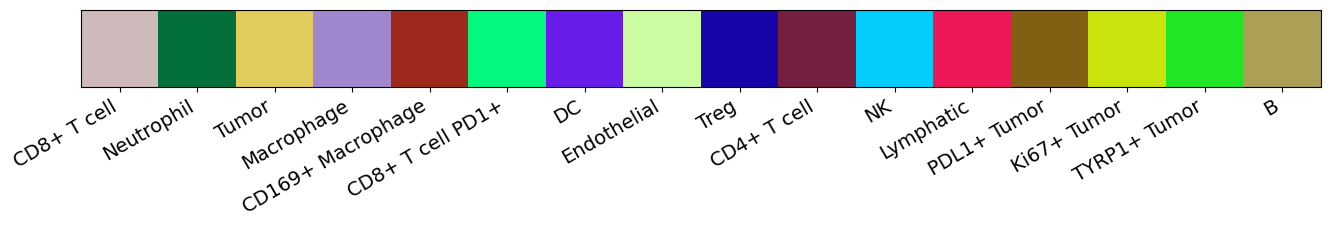

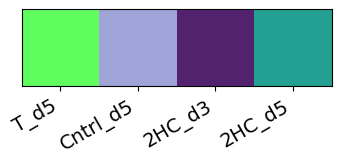

In [12]:
# provide a list with names colors are mapped on (usually cell types, categories or neighborhoods)
cell_names = df["Cell Type"].unique()
Sample_names = df["Sample"].unique()

# provide a list of colors (same length as names list) or generate a random collection of colors
cell_colors = generate_random_colors(n = len(cell_names))
Sample_colors = generate_random_colors(n = len(Sample_names))


# combine both lists into a dictionary 
color_dic_cells = assign_colors(cell_names, cell_colors)
color_dic_Sample = assign_colors(Sample_names, Sample_colors)


## 2.2) Generate visualizations

**How does the function work:**

This is a Python function that generates a stacked bar plot of a given dataset. The function takes in several arguments including the data, column names for categorical variables, a grouping variable, a list of cells to plot, a directory to save the plot, and various plot customization options.

The function starts by checking if the data needs to be normalized based on a boolean parameter "norm". If "norm" is True, then the percentage of each cell type in the dataset is calculated based on the given grouping variable. If "norm" is False, the percentage is calculated across the entire dataset.

The function then pivots the resulting frequency table to create a tidy dataframe that can be used to generate the stacked bar plot. The function allows for customization of the order of columns and rows in the plot, as well as the color palette used.

Finally, the function generates the plot using the matplotlib library and saves it to a file if a save_name argument is provided. The function returns the resulting pivoted dataframe and the column order for the plot.

**What is the biological meaning of this analysis:**

The analysis shows a stacked bargraph for each specified group. Sections within the graph represent the percentage of cells that is present in this group. The user can choose to group data by different categorial variables (e.g. a clinical condition, a treatment). Percentages can be calculated for broader groups (what is the percentage of immune cells?) or single cell types (what is the percentage of CD4+ T cells).

In [15]:
# Arguments for stacked bar plot:

data = df # data frame to use 

per_cat = "Cell Type" # column containing the categories that are used to fill the bar plot

grouping = 'Sample' # column containing a grouping variable (usually a condition or cell group)

norm = True

save_name = 'Percentage_cell_type_per_sample' # name for saved file 

sub_col= 'Cell Type'

name_cat = 'Cell Type'

fig_sizing = (8,4) # numeric value to modify the figure size 

pal_color = color_dic_cells # color dictionary 

remove_leg=False # removes legend if needed

cell_list = df["Cell Type"].unique()

col_order = ["Cntrl_d5", "2HC_d3", "2HC_d5", "T_d5"]

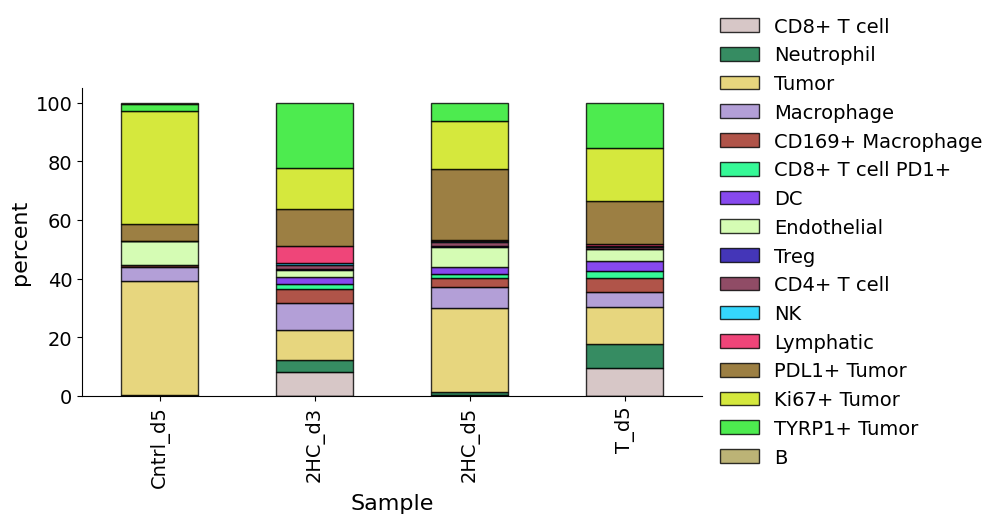

In [17]:
####### Stacked Bar Plot
# Shows percentage of category per group. For example: major cell types per diagnosis 
ab = stacked_bar_plot(data = df, 
                      per_cat = per_cat, 
                      grouping = grouping, 
                      output_dir = output_dir, 
                      sub_col = None, 
                      cell_list = cell_list,
                      norm = False, 
                      fig_sizing = fig_sizing, 
                      name_cat = per_cat, 
                      col_order = col_order, 
                      save_name = save_name, 
                      pal_color = pal_color) 

**How does the function work:**

The swarm_box function takes in several parameters and returns a plot object. The purpose of this function is to create a box plot and swarm plot from the given data.

The function first checks if norm is True. If it is True, it subsets the data and computes the unique values of a given category column to get the percentage of cell type. If norm is False, it copies the entire data. The function then casts the category column to categorical type.

Next, the function computes the percentage of each category column by group and replicate. It converts column names to string type and resets the index. The function adds grouping and replicate to immune_list and subsets the data. It then melts the data frame and renames columns.

If col_in is not None, the function subsets melt_per_plot to include only those values. Otherwise, it does nothing. The function then orders the data by the average percentage of each category column.

If h_order is None, the function uses the unique values of the grouping column as the order. If pal_color is None, the function creates a figure with box plot and swarm plot for each category column or grouping column based on flip value.

If flip is True, the function creates a box plot with given parameters and a swarm plot with given parameters for grouping column. The function sets the transparency of box plot patches. If save_name is not None, the function saves the figure as a PNG file with given parameters.

In summary, the swarm_box function creates a box plot and swarm plot from the given data and returns a plot object. It has several parameters that allow for customization of the plot.

**What is the biological meaning of this analysis:**

In [27]:
print(df["unique_region"].unique())

['T_d5_reg002' 'Cntrl_d5_reg001' '2HC_d3_reg001' '2HC_d5_reg002']


In [20]:
# Arguments for swarm boxplot:

data = df # data frame to use 

grouping = 'Sample' # column containing a grouping variable (usually a condition or cell group)

sub_col = 'Cell Type'

sub_list = ['CD8+ T cell']

replicate_column = "unique_region"

output_dir = output_dir

norm = False

per_cat = "Cell Type"

fig_sizing=(8,4) # numeric value to modify the figure size 

save_name = 'Boxplot_cell_type_per_sample'

pal_color = color_dic_Sample # color dictionary 

h_order=None

flip=True

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:157: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:174: FutureWarning: Passing `palette` without assigning `hue` is deprecated.


<Figure size 800x400 with 0 Axes>

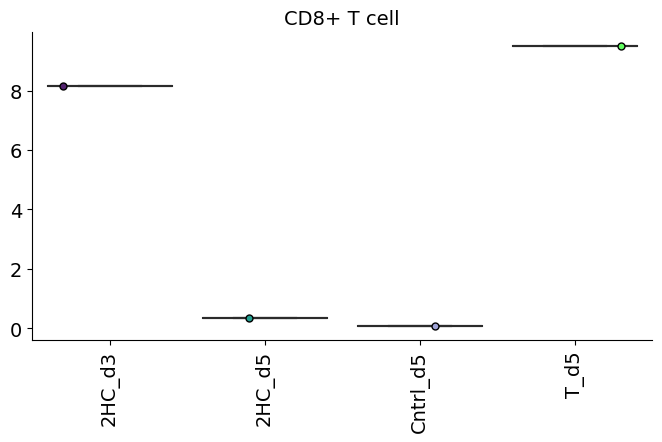

In [23]:
melt_per_plot = swarm_box(data = data, 
                          grouping = grouping, 
                          replicate = replicate_column, 
                          sub_col = sub_col, 
                          sub_list = sub_list, 
                          per_cat = per_cat, 
                          norm=norm,
                          figure_sizing= fig_sizing, 
                          save_name=save_name, 
                          h_order=h_order, 
                          pal_color=pal_color, 
                          flip=flip,
                          output_dir = output_dir)

**How does the function work:**

This Python function calculates the Shannon Diversity of cell types within a sample and performs ANOVA analysis on the results. The function takes in several parameters, including the input data (data1), a list of subgroups within the data (sub_l), a grouping variable (group_com), a category variable (per_categ), a replicate variable (rep), a sub-column variable (sub_column), and a coloring variable (coloring). Other parameters include an output directory (output_dir), a normalization option (normalize), a save option (save), an ordering variable (ordering), and a figure size variable (fig_size).

First, the function calculates the Shannon Diversity using the per_only1() function on the input data and the other parameters passed to the function. It then aggregates the results by replicate and grouping variable and calculates the Shannon Diversity. The results are saved in a Pandas DataFrame (res) with the Shannon Diversity column multiplied by -1.

Next, the function performs ANOVA analysis on the results using the f_oneway() function from the scipy.stats module. The results are saved in the test_results variable. If the test results are significant (p-value < 0.05), the function performs pairwise Tukey's HSD post-hoc analysis using the pairwise_tukeyhsd() function from the statsmodels.stats.multicomp module. The results are saved in a Pandas DataFrame (table1) and plotted using a heatmap with the sns.heatmap() function from the seaborn module.

Finally, the function plots the results using a swarmplot and boxplot with the sns.swarmplot() and sns.boxplot() functions from the seaborn module. The plot is customized with various parameters, including the coloring variable, ordering variable, and fig_size variable. If the save option is enabled, the plot is saved in the output directory. The function returns three variables: the Shannon Diversity data (tt), the ANOVA test results (test_results), and the Tukey's HSD results (table1).

**Further information on per_only1 function:** 

The per_only1 function is a helper function that takes in a pandas DataFrame data, and several other arguments including grouping, replicate, sub_col, sub_list, per_cat, and norm.

The function first filters the DataFrame data based on the values in sub_col column that are in sub_list, and then calculates the percentage of each unique value in the per_cat column for the filtered DataFrame.

If norm is True, the function normalizes the percentage values by dividing them by the total count of each unique value in the per_cat column. Otherwise, it calculates the percentage without normalization.

The resulting DataFrame contains the grouping column, replicate column, per_cat column, and a column specifying the percentage. The grouping and replicate columns are specified by the arguments passed to the function, and the per_cat column is the column containing the cell types or categories of interest.

The melt_per_plot DataFrame returned by the function can be used for plotting or further analysis. An example of the output would be the percentage of CD4+ T cells in a unique region E08 assigned to community xxx.

**What is the biological meaning of this analysis:**

Estimates the diversity within a given community. The figure shows the Shannon Diversity Index for the specified groups as boxplot showing the replicates as individual datapoints. Typical replicates are the unique regions within the respective group. 

A higher score indicates a higher degree of diversity within the analyzed group. CAVE: rare cell types might be overrepresented in statistical evaluation. 

In [ ]:
# Arguments for Shannon diversity plot:

data = df # input data frame 

sub_l = ['CD4+ Treg', "B"]

group_com = 'consensus diagnosis' # column containing a grouping variable (usually a condition or cell group)

per_categ = "Major Cell Cat"

rep = "unique_region" # replicate column (usually the unique regions per sample)

sub_column = 'Cell Type'

normalize = False

save = True # logical value to decide if the generated plot should be saved 

coloring = color_dic_diagnosis # color dictionary 

fig_size = 8 # numeric value to modify the figure size 

ordering = None # optional list to specify the plotting order

output_dir = output_dir # directory to save output

In [ ]:
####### Swarm Boxplot of Shannon diversity score
result, pval, tukey_tab = Shan_div(data = data, \
                                   sub_l = sub_l, \
                                   group_com = group_com, \
                                   per_categ = per_categ, \
                                   rep = rep, \
                                   sub_column=sub_column, \
                                   normalize=normalize, \
                                   save=save, \
                                   coloring= coloring, \
                                   fig_size=fig_size, \
                                   ordering=ordering, \
                                   output_dir = output_dir)

**How does the function work:**

**corr_cell**

This function performs a correlation analysis on a dataset and plots the results. The function takes several arguments:

- data: the input data for the analysis
- sub_l2: a list of subcategories for grouping the data
- per_categ: the category for calculating the percentage
- group2: a grouping variable for the analysis
- repl: a variable for replicates
- sub_column: the name of the column that contains subcategory data
- cell: the cell type for the analysis
- output_dir: the directory where the output plot will be saved
- save_name: the name for the output plot
- thres: the threshold for correlation analysis
- normed: whether to normalize the data (default is True)
- cell2: an optional second cell type for the analysis

The function first calls the per_only1 function on the input data to calculate the percentage based on the specified categories, subcategories, and replicates. It then creates a pivot table from the resulting data, calculates the correlation matrix, and subsets the matrix based on the specified threshold and cell type.

The function then plots the correlation matrix using the cor_subplot function and saves the plot to the specified directory with the specified name. Finally, the function returns two sets of pairs: all pairs and pairs for the specified cell type.

**cor_plot**

The cor_plot function takes in a Pandas DataFrame data, and several parameters to create a heatmap and scatter plot of the correlation matrix between the columns in the DataFrame. The function can take in two grouping variables group1 and group2 and creates a heatmap of the correlation matrix between the percentage of each variable in per_cat. The sub_col parameter specifies the column to filter the data by the values in sub_list. If norm is True, the percentage values are normalized by the sum of the values in the column sub_col. If count is True, the count of each variable is used instead of the percentage. If plot_scatter is True, a scatter plot matrix is created with a regression line for each pair of variables.

If group2 is not specified, the correlation matrix is created between the percentage of each variable in per_cat for each unique value in group1. If count is True, the count of each variable is used instead of the percentage.

The function returns the correlation matrix cor_mat and the DataFrame used to create the heatmap and scatter plot mp.

**cor_subplot**

The function cor_subplot takes three required arguments mp, sub_list, and output_dir and one optional argument save_name.

The mp argument is a pandas DataFrame which contains data to be plotted in a correlation subplot. sub_list is a list of column names of the mp DataFrame for which the correlation matrix will be plotted. output_dir is a string which specifies the output directory where the figure will be saved.

The function first selects the columns specified in the sub_list argument from the mp DataFrame and creates a pairwise scatterplot matrix using Seaborn's pairplot function with kernel density estimates on the diagonal and linear regression fits on the lower triangle. The corner=True argument sets the diagonal axes to be drawn only once.

If save_name is not None, the function saves the figure to a file in the specified output_dir with the name save_name+'_corrplot.png'. The saved figure is in PNG format with a DPI of 300 and transparent background. The bbox_inches='tight' argument adjusts the figure size to remove any whitespace padding.
    
**What is the biological meaning of this analysis:**
    

In [ ]:
# Arguments correlation analysis: 

# corr_cell
data = df # input data frame

sub_l = ['CD4+ Treg', 'B']

group_com = "consensus diagnosis" 

per_categ = "Major Cell Cat"

rep = "unique_region"

sub_column = "Cell Type"

normed = True

save = True

coloring = None

fig_size = 8

thres = 0.7

ordering = None

output_dir = output_dir

cell = 'CD4+ Treg'
cell2 = 'Endothelial CD36hi'

sub_column = 'Major Cell Cat'

group2 = 'Sub diagnosis'

save_name = "cell1_cell2_cor"

# cor_plot
group1 = 'Major Cell Cat'

per_cat = 'Cell Type'

sub_col = 'Major Cell Cat'

sub_list = ['CD4+ Treg', 'B']

norm = True

count = False

plot_scatter = False

# Prepare subplot 
cell_type = 'Epithelial CK7+'

In [ ]:
####### Correlation Analysis 

all_pair, sub_pair = corr_cell(data = data, \
                               sub_l2 = sub_l, \
                               per_categ = per_categ, \
                               group2 = group2, \
                               rep = rep, \
                               sub_column = sub_column, \
                               cell = cell, \
                               normed = normed, \
                               thres = thres, \
                               cell2 = cell2,
                               output_dir = output_dir, 
                               save_name = save_name)

cor_mat, mp = cor_plot(data = data, \
                       group1 = group1, \
                       per_cat = per_cat, \
                       sub_col= sub_col, \
                       sub_list= sub_l, \
                       norm=True, \
                       count=False, \
                       plot_scatter=False)


piar1 = all_pair.loc[all_pair['col1']==cell_type]
piar2 = all_pair.loc[all_pair['col2']==cell_type]
piar=pd.concat([piar1,piar2])
piar

pair_list = list(set(list(piar['col1'].unique())+list(piar['col2'].unique())))
pair_list

sl = pair_list

cor_subplot(mp=mp, \
            sub_list=sl, \
            output_dir = output_dir)

# 3) Neighborhood and Community Analysis 

## 3.1) Neighborhood analysis 

**How does the function work:**

I apologize for the confusion. You are correct, the third bar plot also shows stacked bars normalized to 100 percent.

Here's an updated description of the function:

This Python function is designed to visualize the composition of different cell types in a given dataset. The input to the function is a pandas dataframe (df) containing information about the samples and their cell types. The sample_column argument specifies the name of the column in the dataframe that contains sample identifiers, and cell_type_column specifies the name of the column containing the cell type information.

If an output_dir is specified, the function generates three different bar plots of the cell type composition. The first plot shows the absolute count of each cell type for each sample, where the bars are stacked. The second plot shows the percentage of each cell type in each sample. The third plot shows the absolute count of each cell type for each sample, where the bars are stacked and normalized to 100 percent.

All three plots are saved as PNG files in the specified output_dir.

If no output_dir is specified, the function prints a message saying that no output directory has been defined.
    
**What is the biological meaning of this analysis:**

These visualizations are ment to provide a general overview of the global composition of each individual sample. The function provides three different variations of bar graphs.
1. Stacked bar graph showing the absolut count of the category 
2. Bar graph that shows the counts per category side by side 
3. Stacked bar graph showing the percentage of each category per sample
    

In [28]:
# Arguments for composition visualization function:

data = df # data frame to use

sample_column = "Sample" # column that specifies the sample

cell_type_column = 'Cell Type' # column that specifies cell types - other variables will be accepted as well

output_dir = output_dir # directory to save output 

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:353: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


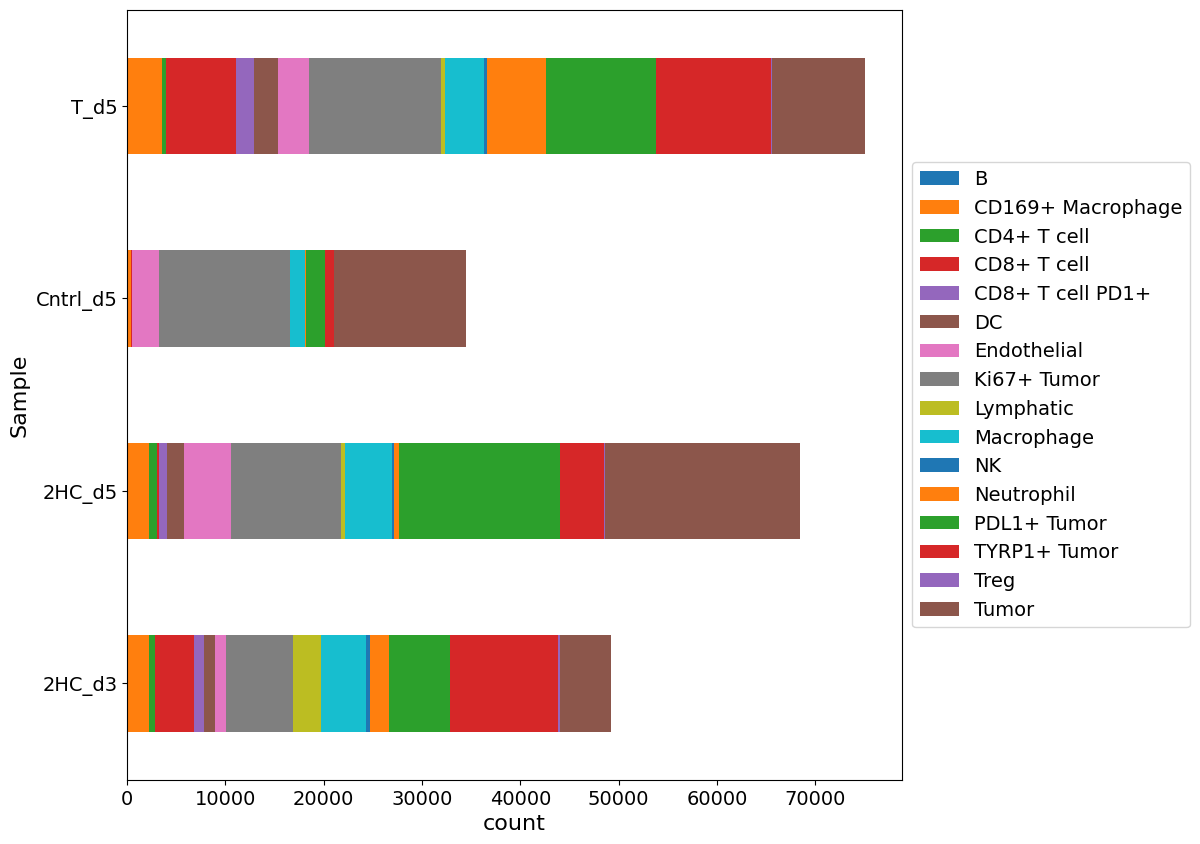

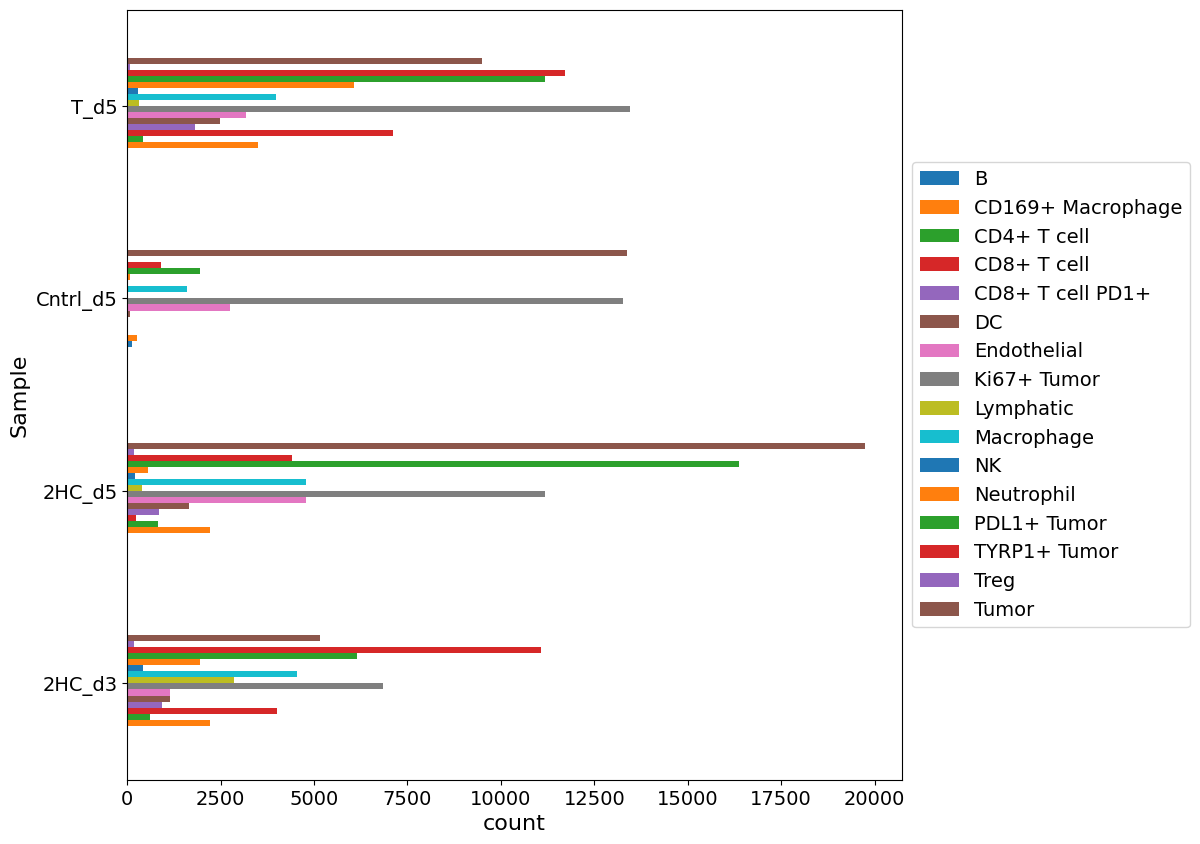

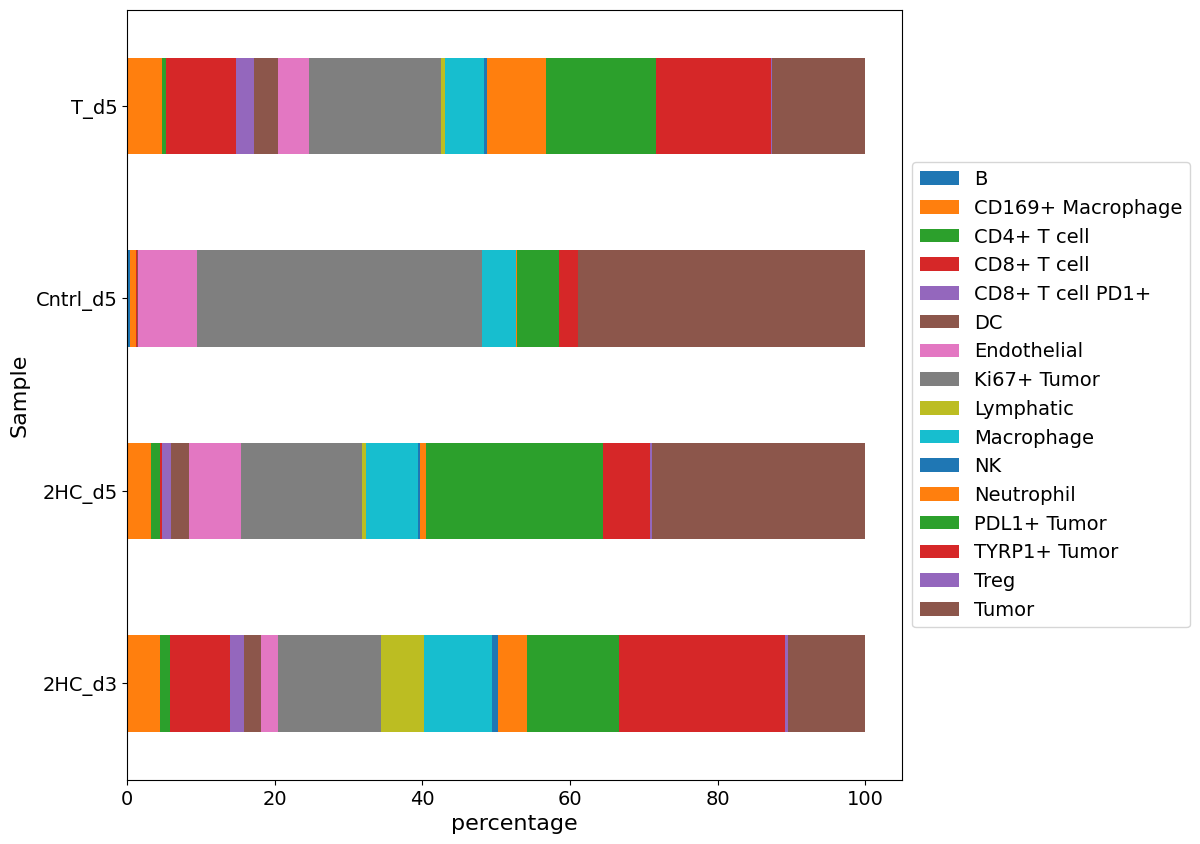

In [29]:
####### Visulize overall cell type composition
cell_type_composition_vis(data = df, \
                          sample_column = sample_column, \
                          cell_type_column = cell_type_column, \
                          output_dir = output_dir)

**How does the function work:**
    
**What is the biological meaning of this analysis:**

Allocate every cell to a broader group based on its spatial context. Cellular Neighborhoods (CN) can be understood as common groups of cells which are shared by multiple regions (e.g. the "generic tumor neighborhood" is found in every tumor of dataset xxx). This code assings the neighborhoods, plots a spatial plot colored by neighborhoods and generates a heatmap that illustrates which celltype is found in the generated neighborhoods. 

**NOTE: This function modifies the data frame**

The function adds a column called neighborhoods_k (k is replaced with the value used for k). This column contains the ID of the assigned neighborhood for each cell. After executing the function, every neighborhood is represented by a number (starting with 0). In order to receive biological meaningful names, neigborhoods need to be annotated based on marker expression with the help of an expert or automated annotation approach. 

In [30]:
# Arguments for neighborhood analysis:

X = "x" # column containing the x coordinates 

Y = "y" # column containing the y coordinates 

reg = "unique_region" # column containg the unique regions 

cluster_col = "Cell Type" # column which is used for clustering - typically cell types (to generate cellular neighborhoods)

ks = [20] # k=n means it collects n nearest neighbors for each center cell

output_dir = output_dir

k = 20

n_neighborhoods = 20 # number of generated neighborhoods - value should be biologically meaningful 

save_to_csv= True

plot_specific_neighborhoods = [2,4]

/var/folders/6d/0x48qjh15rx9851lpdwvrxvc0000gn/T/ipykernel_5761/3374599978.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


Starting: 3/4 : 2HC_d3_reg001
Finishing: 3/4 : 2HC_d3_reg001 0.33400511741638184 0.3343641757965088
Starting: 4/4 : 2HC_d5_reg002
Finishing: 4/4 : 2HC_d5_reg002 0.4259531497955322 0.7672750949859619
Starting: 2/4 : Cntrl_d5_reg001
Finishing: 2/4 : Cntrl_d5_reg001 0.1931619644165039 0.9706902503967285
Starting: 1/4 : T_d5_reg002
Finishing: 1/4 : T_d5_reg002 0.4812028408050537 1.4574987888336182


/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:403: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:405: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


T_d5_reg002


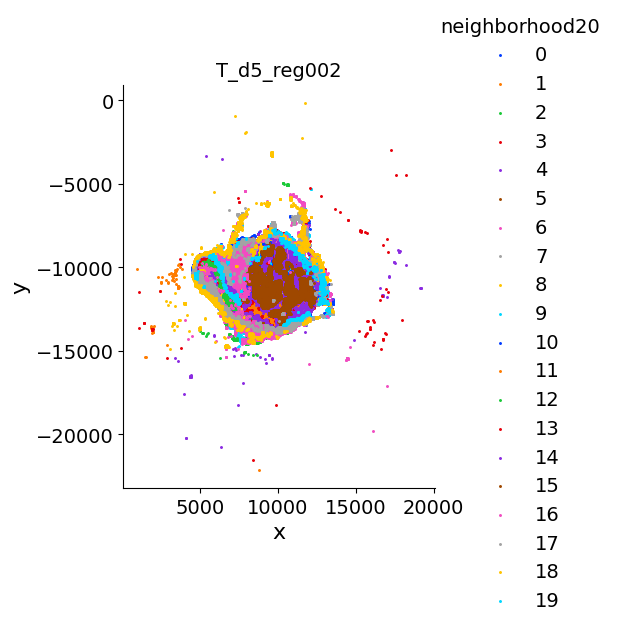

Cntrl_d5_reg001


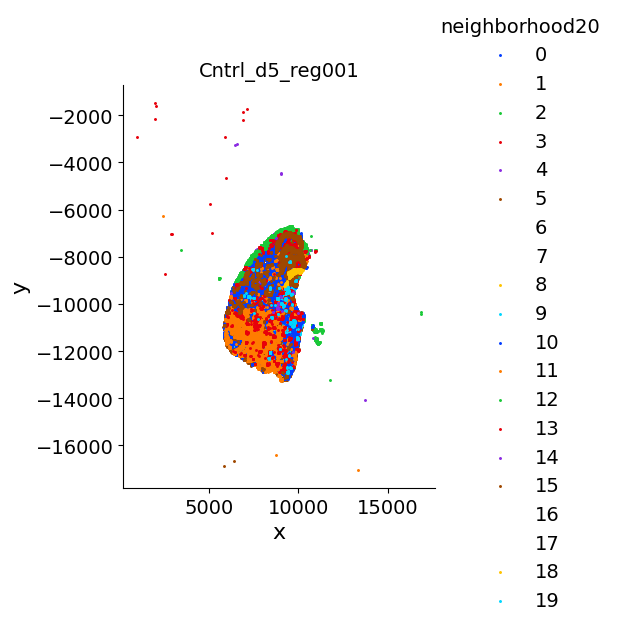

2HC_d3_reg001


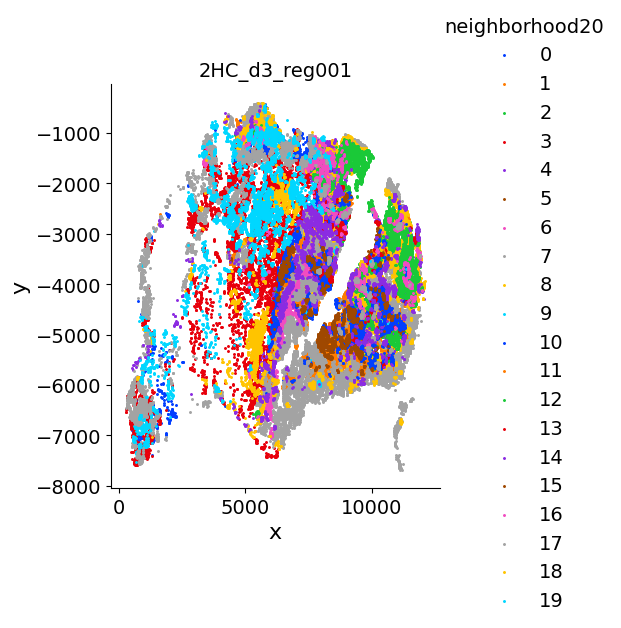

2HC_d5_reg002


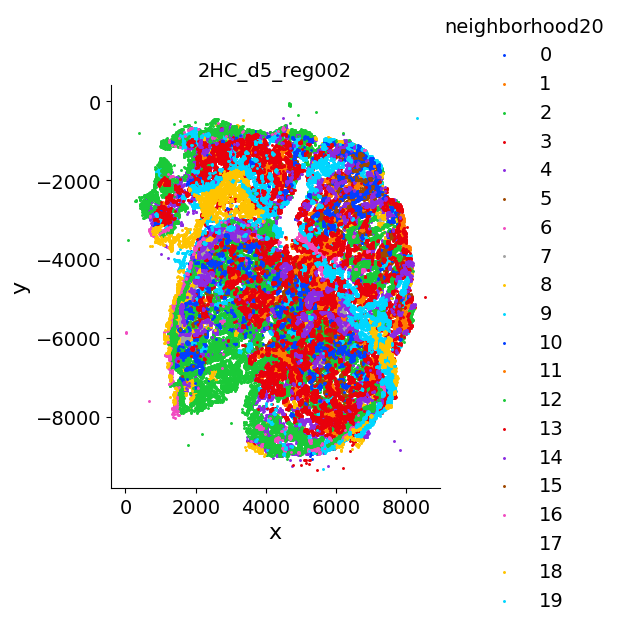

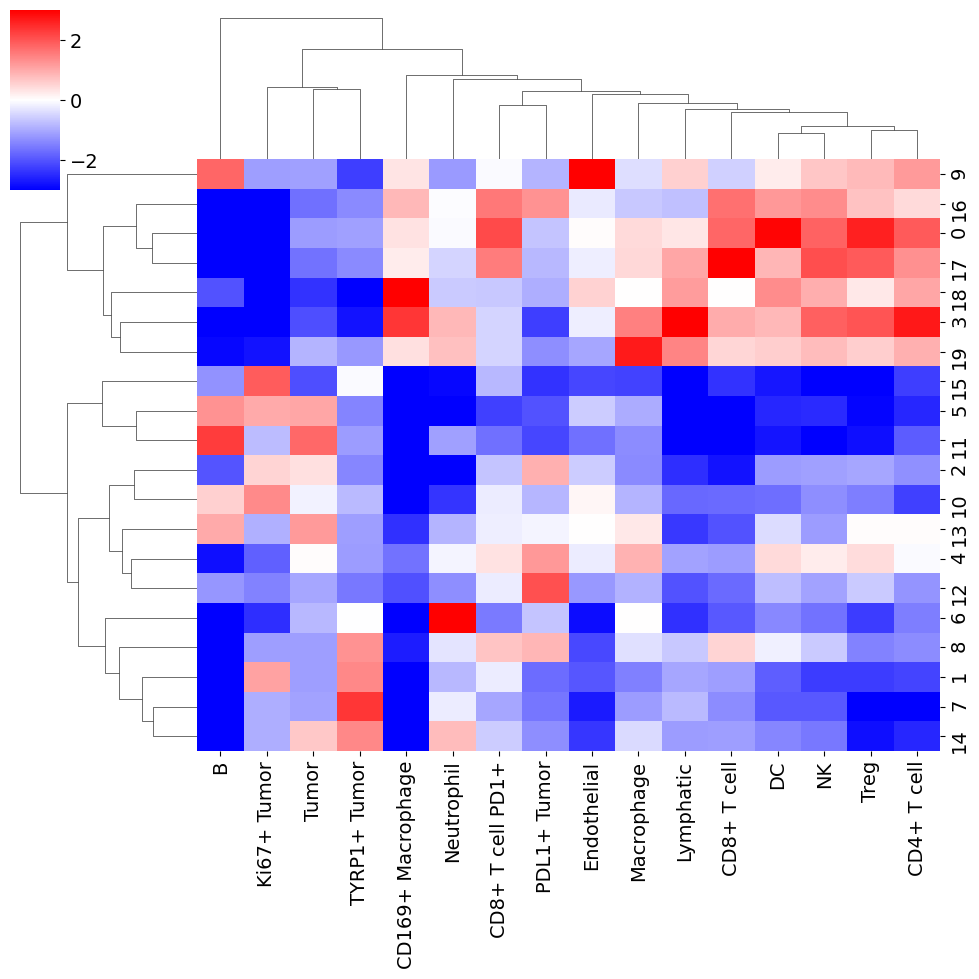

In [31]:
####### Neighborhood analysis 
df2 = pd.concat([df,pd.get_dummies(df[cluster_col])],1)
sum_cols = df2[cluster_col].unique()
values = df2[sum_cols].values

k_centroids = {}

cells_df = neighborhood_analysis(data = df2, \
                                 X = X, \
                                 Y = Y, \
                                 reg = reg, \
                                 cluster_col = cluster_col, \
                                 ks = ks, \
                                 output_dir = output_dir, \
                                 k = k, \
                                 n_neighborhoods = n_neighborhoods, \
                                 save_to_csv= True, \
                                 plot_specific_neighborhoods = [2,4], \
                                 values = values, \
                                 sum_cols = sum_cols)

## 3.2) Community Analysis 

**How does the function work:**
    
**What is the biological meaning of this analysis:**

This analysis is very similar to the neighborhood analysis but classifies even broader groups. Instead of cell types neighborhoods are used for
    
**NOTE: This function modifies the data frame**

The function adds a column called communities_k (k is replaced with the value used for k). This column contains the ID of the assigned community for each cell. After executing the function, every community is represented by a number (starting with 0). In order to receive biological meaningful names, communities need to be annotated based on incorporated neighborhoods with the help of an expert or automated annotation approach. 

In [32]:
# Arguments for community analysis:

df = cells_df

X = X

Y = Y

reg = "unique_region"

cluster_col_commun = "neighborhood20"

ks_commun = [10] # k=n means it collects n nearest neighbors for each center cell

output_dir = output_dir

k_commun = 10

n_communities_commun = 10

plot_specific_community = [2,4,5]

values = values

sum_cols = sum_cols

Starting: 3/4 : 2HC_d3_reg001
Finishing: 3/4 : 2HC_d3_reg001 0.22403192520141602 0.22440814971923828
Starting: 4/4 : 2HC_d5_reg002
Finishing: 4/4 : 2HC_d5_reg002 0.29866504669189453 0.5273869037628174
Starting: 2/4 : Cntrl_d5_reg001
Finishing: 2/4 : Cntrl_d5_reg001 0.12450408935546875 0.6572890281677246
Starting: 1/4 : T_d5_reg002
Finishing: 1/4 : T_d5_reg002 0.3261229991912842 0.9855248928070068


/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:879: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:881: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


T_d5_reg002


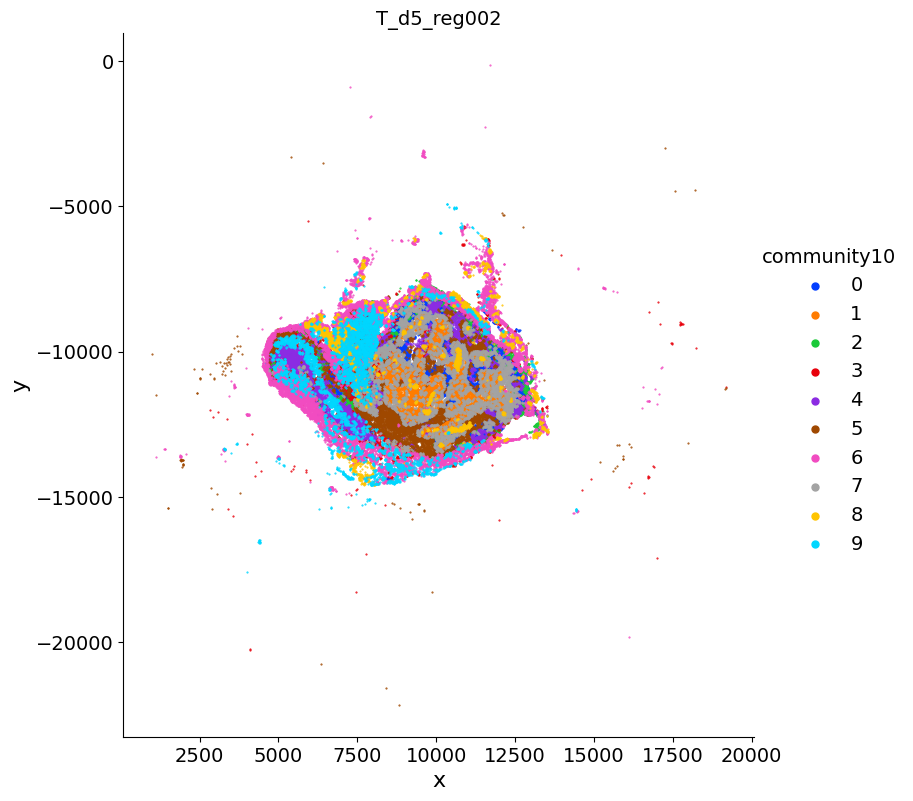

Cntrl_d5_reg001


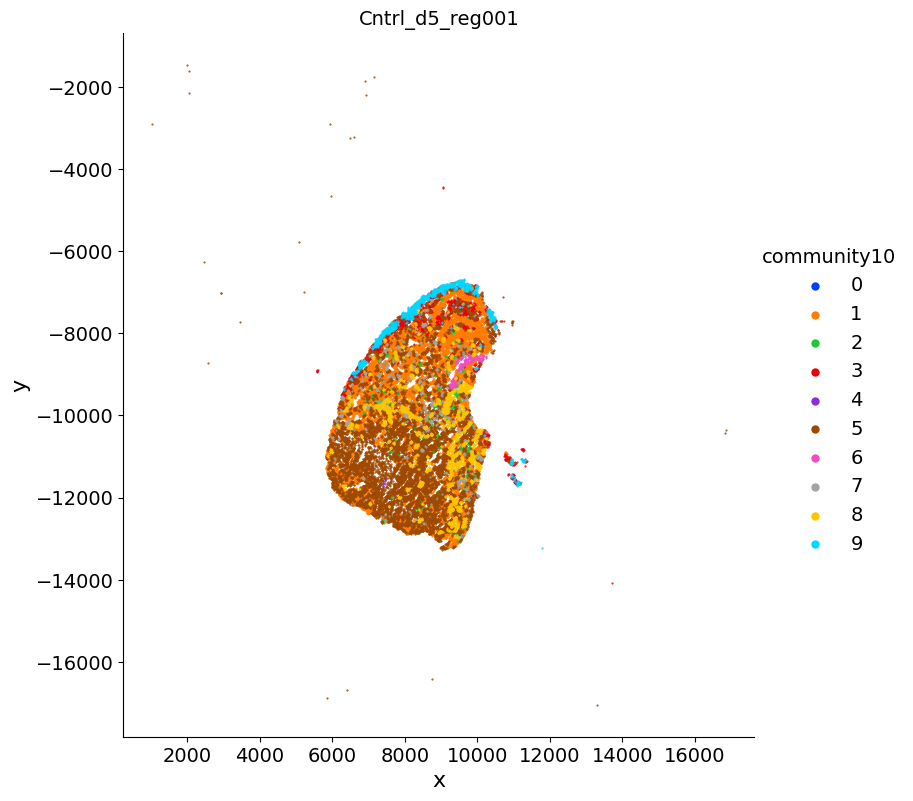

2HC_d3_reg001


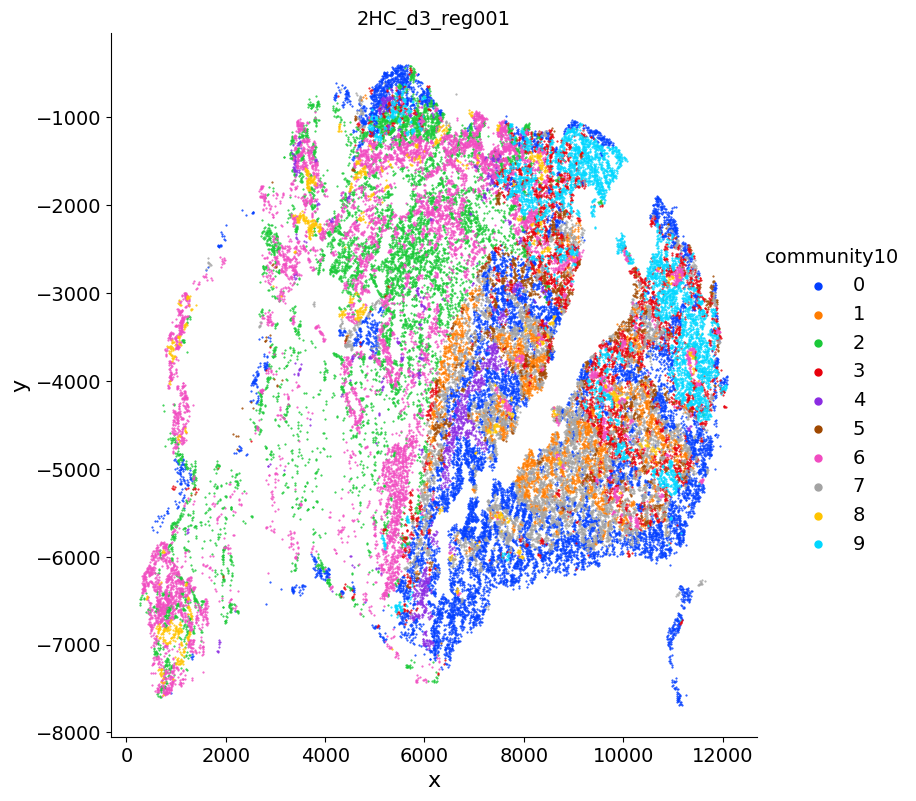

2HC_d5_reg002


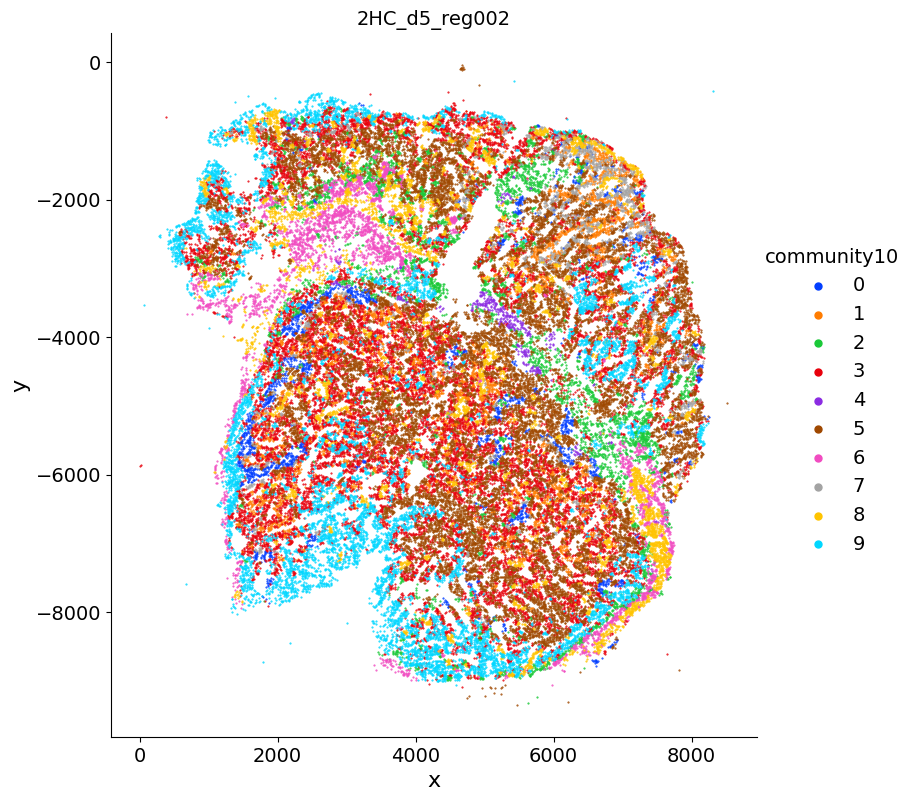

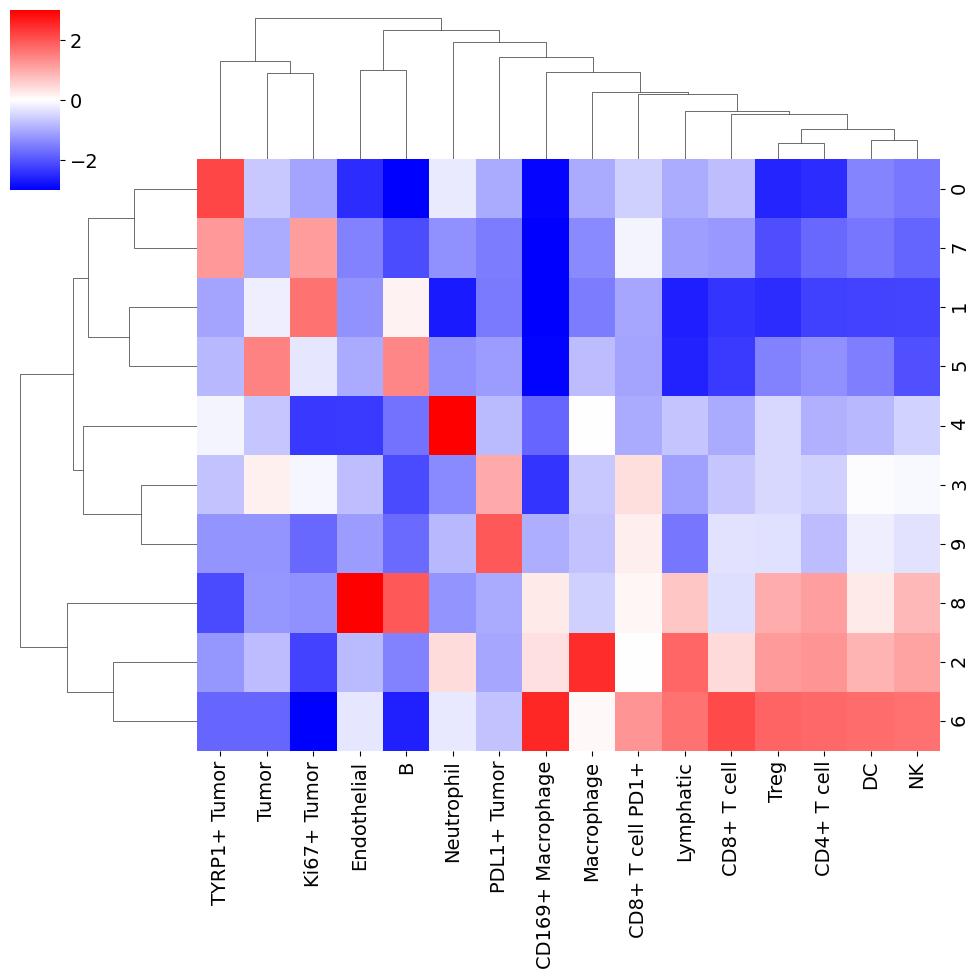

In [33]:
k_centroids = {}

cells_df2 = community_analysis(data = cells_df, \
                               X = X, \
                               Y = Y, \
                               reg = reg, \
                               cluster_col = cluster_col_commun, \
                               ks = ks_commun, \
                               output_dir = output_dir, \
                               k = k_commun, \
                               n_neighborhoods = n_communities_commun, \
                               plot_specific_community = [2,4,5], \
                               values = values, \
                               sum_cols = sum_cols)

# 4) Analysis dependent on neighborhood analysis 

## 4.1) Specify additional column names 

## 4.2) Cell Type Differential Enrichment 

**How does the function work:**

**cell_types_de_helper**

The cell_types_de_helper function takes a pandas DataFrame (df), as well as several column names and dictionaries as inputs, and performs various data transformation operations on the input DataFrame to generate several outputs.

The function first reads in the input DataFrame df and generates a unique ID by concatenating two columns specified by the ID_component1 and ID_component2 inputs. It then creates a dictionary called neigh_num that maps each unique value in the neighborhood_col column of the input DataFrame to a unique integer index starting from 0. The function then creates a new column called group by mapping each value in the group_col column to its corresponding integer value from a dictionary called group_dict.

The function then creates a new dictionary called pat_dict that maps each unique value in the donor_tis column of the input DataFrame to a unique integer index starting from 0. The function assigns these integer indices to each patient in the donor_tis column, creating a new column called patients. The function then drops duplicates from the patients and group columns and creates a new dictionary called pat_to_gp that maps each patient to their corresponding group.

The function then groups the input DataFrame by patients and calculates the frequency of each value in the cell_type_col column for each patient, normalized by the total number of cells for that patient. The function stores the resulting DataFrame as ct_freq.

Finally, the function groups the input DataFrame by both patients and neigh_num, and calculates the frequency of each value in the cell_type_col column for each neighborhood and patient, normalized by the total number of cells for that patient and neighborhood. The function stores the resulting DataFrame as all_freqs.

The function returns several outputs, including the transformed input DataFrame (cells2), the ct_freq and all_freqs DataFrames, as well as the pat_to_gp and neigh_num dictionaries.

**cell_types_de**
This function performs differential enrichment analysis of cell types between different neighborhoods in a tissue.


The function takes in several inputs, including cell type frequencies, patient data, neighborhood data, and an output directory. The function first normalizes overall cell type frequencies and neighborhood-specific cell type frequencies, and then calculates differential enrichment for all cell subsets using linear regression. It creates a heatmap to visualize the changes in cell type frequencies across different neighborhoods, with asterisks indicating statistical significance (p < 0.05).

After correcting p-values for multiple testing, it generates a second heatmap that is sorted by the sum of absolute values of coefficients in each row and column. Finally, it saves the heatmap plot as a PNG file in the specified output directory and returns the sum of absolute values of coefficients in the sorted dataframe.

- ct_freq: a pandas DataFrame with cell type frequencies for all samples
- all_freqs: a pandas DataFrame with cell type frequencies and neighborhood information for all samples
- neighborhood_num: the name of the column in all_freqs that contains the neighborhood information
- nbs: a list of integers representing the neighborhoods to analyze
- patients: a list of patient IDs to include in the analysis
- group: a pandas Series with group information (0 or 1) for each sample
- cells: a list of cell type names to analyze
cells1: a list of cell type names with neighborhood-specific information to analyze
neigh_num: a dictionary mapping neighborhood numbers to names
output_dir: a string representing the output directory for the generated plots
The function then performs several steps:

Normalize the overall cell type frequencies and the neighborhood-specific cell type frequencies for the specified patient IDs using the normalize function.
For each neighborhood in nbs, concatenate the normalized neighborhood-specific cell type frequencies for the specified patient IDs into a design matrix with a constant, group 0 or 1, and the normalized overall cell type frequencies. Then, fit a linear regression model to the neighborhood-specific cell type frequencies, where the neighborhood-specific cell type frequencies are the outcome and the design matrix is the predictor.
Store the p-values and coefficients for the group coefficient in each linear regression model in a dictionary.
Correct the p-values for multiple testing (this step is currently missing in the code).
Create a heatmap of the coefficients for each cell type and neighborhood, using the sns.heatmap function.
Sort the rows and columns of the heatmap by the absolute sum of the coefficients across neighborhoods and cell types.
Add asterisks to the heatmap for any cell type and neighborhood combination where the p-value is less than 0.05.
Save the heatmap as a PNG file in the specified output directory.
Return the sum of the absolute values of the coefficients in the sorted heatmap.



    
**What is the biological meaning of this analysis:**
Identifies cell populations that statistical significantly differ between CNs
    

In [36]:
# Arguments for cell type differential enrichment analysis:

ID_component1 = 'Sample'

ID_component2 = 'region_num'

neighborhood_col = 'neighborhood20'

group_col = 'Sample'

group_dict = {'Cntrl_d5':0, '2HC_d3':1, "2HC_d5":2, "T_d5":3}

cell_type_col = 'Cell Type'

neighborhood_col_number = 'neigh_num'

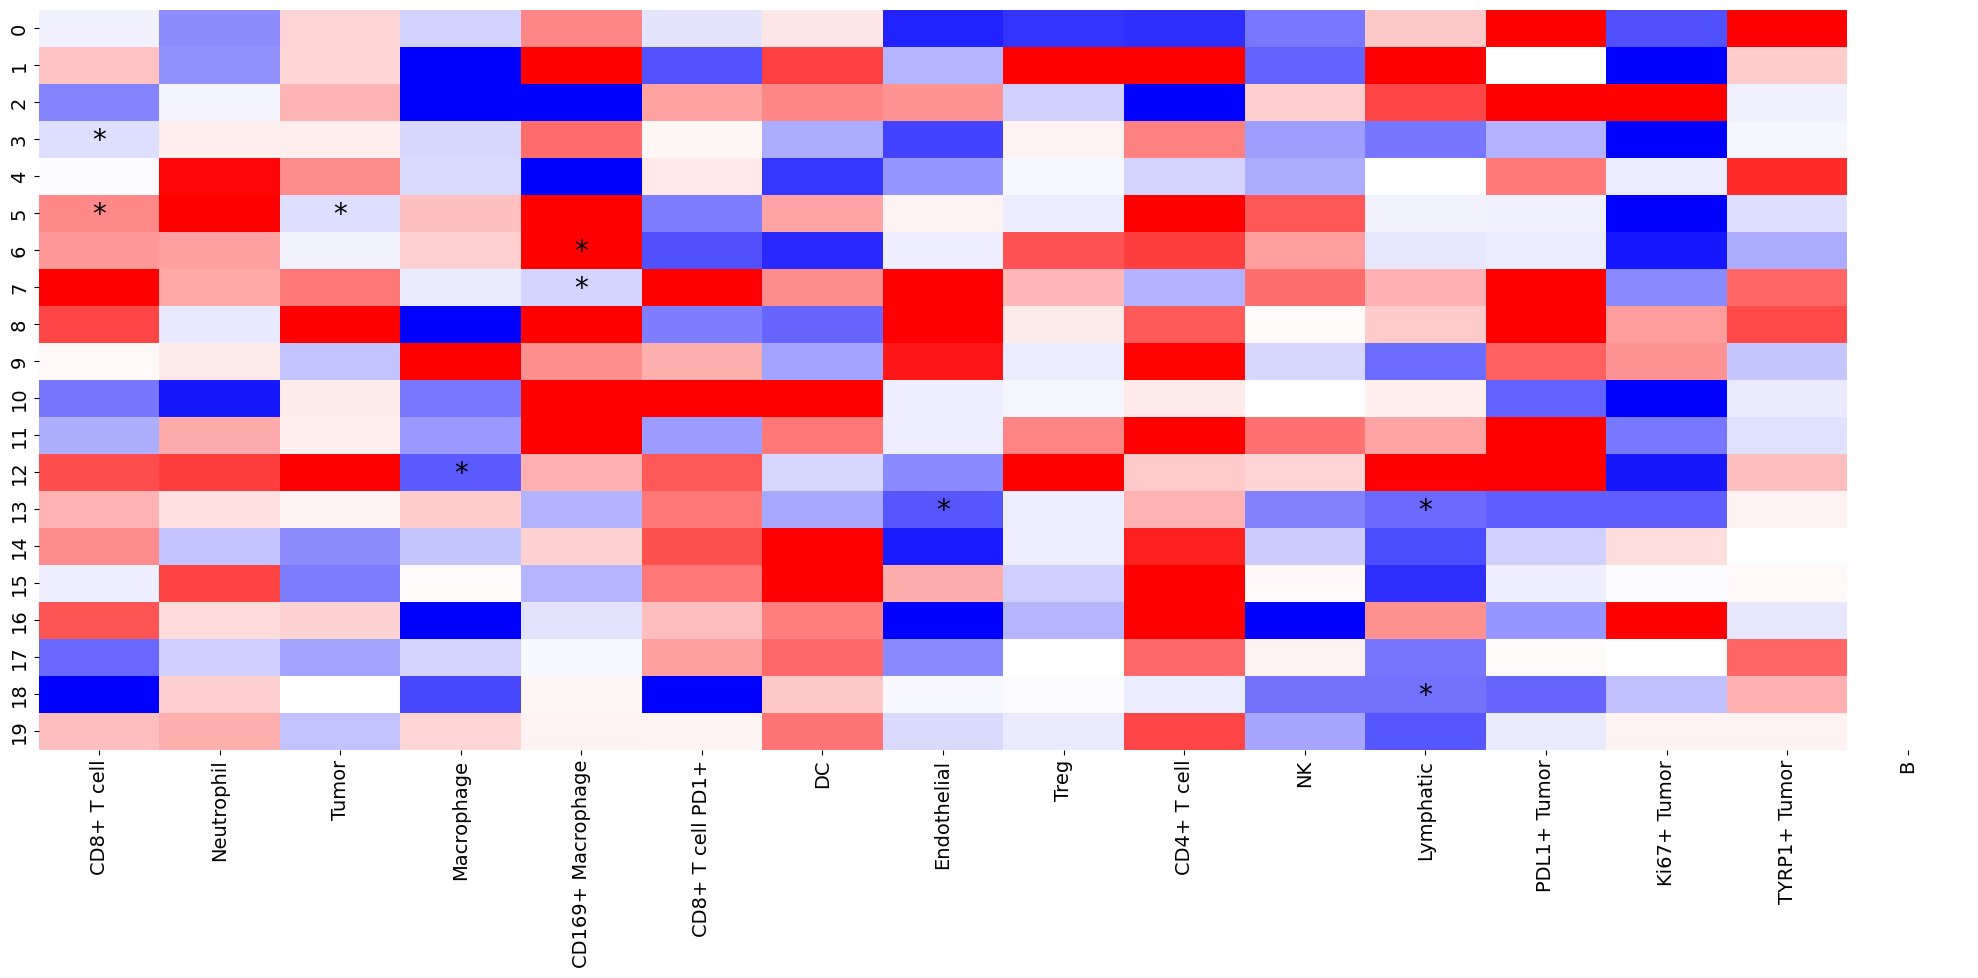

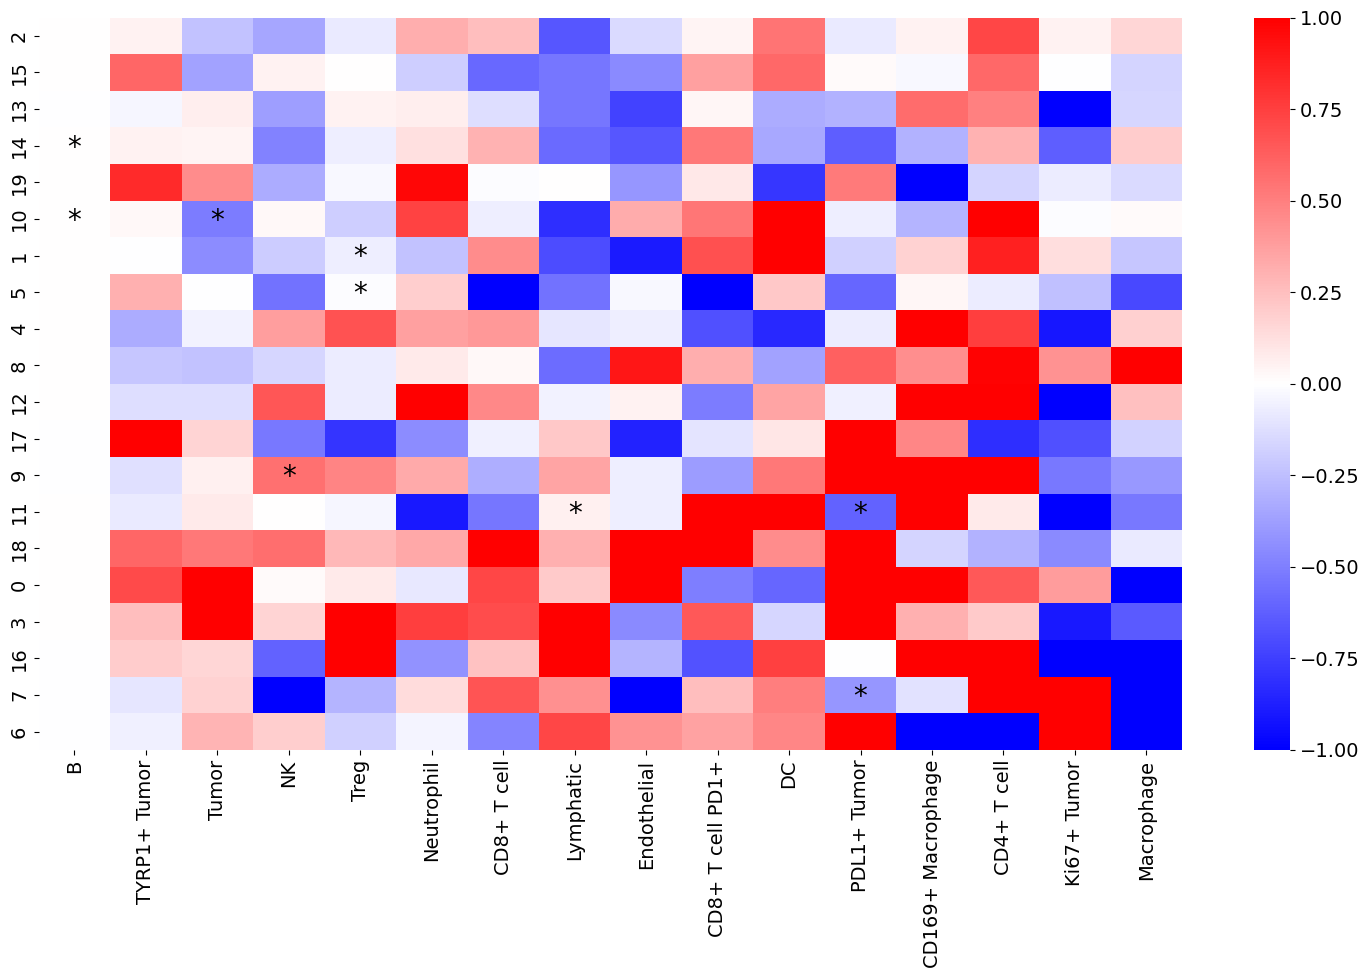

In [37]:
cells2, ct_freq, all_freqs, pat_to_gp, neigh_num = cell_types_de_helper(df = cells_df, \
                                                                        ID_component1 = ID_component1, \
                                                                        ID_component2 = ID_component2, \
                                                                        neighborhood_col = neighborhood_col, \
                                                                        group_col = group_col, \
                                                                        group_dict = group_dict, \
                                                                        cell_type_col = cell_type_col)

nbs = list(cells2[neighborhood_col_number].unique())
patients = list(cells2['patients'].unique()) 
group = pd.Series(pat_to_gp)
cells = list(cells2['Cell Type'].unique())
#cells = ['Tumor','CD4+ Treg']

cells1 = cells.copy()
cells1.append('patients')
cells1

cell_types_de(ct_freq = ct_freq, \
              all_freqs = all_freqs, \
              neighborhood_num = neighborhood_col_number, \
              nbs = nbs, \
              patients = patients, \
              group = group, \
              cells = cells, \
              cells1 = cells1, \
              neigh_num = neigh_num, \
              output_dir = output_dir)

## 4.3) Canonical Correlation Analysis (CCA) 

**How does the function work:**
    
**What is the biological meaning of this analysis:**

Neighborhoods/Communities influence each other. This communication can be described as correlation. Correlation can either be analyzed on the single cell level (occurence of cell type A in neighborhood 1 is negative/positive correlated with its occurence in neighborhood 2 - this can then also be compared between conditions e.g good/bad prognosis for cancer type xxx -> alteratiions in CN communication might be implecated in better/worse antitumoral immune responses etc...) or on the level of multiple celltypes.
Canonical Correlation Analysis (CCA) looks at the frequency of multiple cell types (or neighborhoods). The idea is to build inter-CN communication networks. These networks can be visualized as graphs. 
    

In [38]:
# Arguments for CCA:

ID_component1 = 'Sample'

ID_component2 = 'region_num'

neighborhood_col = 'neighborhood20'

In [39]:
# Prepare IDs this could for example be the combination of patient ID and tissue type. Apart from that, the function assigns a number to each name from the neighborhood column
cells_df = prepare_neighborhood_df(cells_df, 
                                   neighborhood_column = neighborhood_col, 
                                   patient_ID_component1 = ID_component1, 
                                   patient_ID_component2 = ID_component2) # this is a helper function 


You assigned following identifiers to the column 'patients':
['T_d5_reg002' 'Cntrl_d5_reg001' '2HC_d3_reg001' '2HC_d5_reg002']

You assigned following numbers to the column 'neigh_num'. Each number represents one neighborhood:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [67]:
# devide IDs/patients into groups
patient_to_group_dict = cells_df.loc[:,['patients',ID_component2]].drop_duplicates().set_index('patients').to_dict()[ID_component2]
group1_patients = [a for a,Sample in patient_to_group_dict.items() if Sample=="reg001"]
#group2_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=='Resection']

In [68]:
group1_patients

['Cntrl_d5_reg001', '2HC_d3_reg001']

In [69]:
n_perms = 5000 # set number of permutation params

#subsets = ['CD4+ T cell']

subsets = None

In [70]:
# Provide user feedback
print(group1_patients)

# select which neighborhoods and functional subsets
cns = list(cells_df['neigh_num'].unique())
print(cns)

#log (1e-3 +  neighborhood specific cell type frequency) of functional subsets) ('nsctf')
if subsets != None:
    nsctf = np.log(1e-3 + cells_df.groupby(['patients','neigh_num'])[subsets].mean().reset_index().set_index(['neigh_num','patients']))
    print(nsctf)
else:
    nsctf = np.log(1e-3 + cells_df.groupby(['patients','neigh_num']).mean().reset_index().set_index(['neigh_num','patients']))
    print(nsctf)

cca = CCA(n_components=1,max_iter = 5000)
func = pearsonr

['Cntrl_d5_reg001', '2HC_d3_reg001']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
                         Unnamed: 0       CD5     FOXP3      NK11      CD19  \
neigh_num patients                                                            
0         2HC_d3_reg001   11.710215 -1.959041       NaN       NaN       NaN   
1         2HC_d3_reg001   11.786752       NaN -3.687663       NaN       NaN   
2         2HC_d3_reg001   11.725630       NaN       NaN       NaN       NaN   
3         2HC_d3_reg001   11.827706       NaN       NaN       NaN       NaN   
4         2HC_d3_reg001   11.732871       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
15        T_d5_reg002     10.711737       NaN       NaN       NaN       NaN   
16        T_d5_reg002     10.711411       NaN       NaN       NaN       NaN   
17        T_d5_reg002     10.886276       NaN       NaN       NaN       NaN   
18        T_d5_reg002  

/var/folders/6d/0x48qjh15rx9851lpdwvrxvc0000gn/T/ipykernel_5761/3363112892.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log


In [75]:
# Run CCA
stats_group = Perform_CCA(cca = cca, 
                          n_perms = n_perms, 
                          nsctf = nsctf, 
                          cns = cns, 
                          subsets = subsets, 
                          group = group1_patients)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
12 13
12 14
12 15
12 16
12 17
12 18
12 19
13 14
13 15
13 16
13 17
13 18
13 19
14 15
14 16
14 17
14 18
14 19
15 16
15 17
15 18
15 19
16 17
16 18
16 19
17 18
17 19
18 19


In [72]:
# OPTIONAL

# print the name/number key for every neighborhood 
# Display DataFrames

# Using Zip method
ans = zip(cells_df.neighborhood20,cells_df.neigh_num)

# Converting it into list
ans = list(ans)

# Converting it into dictionary
ans = dict(ans)

# Display ans
print("Result of apply:\n",ans,"\n")

Result of apply:
 {17: 0, 16: 1, 6: 2, 13: 3, 19: 4, 12: 5, 4: 6, 18: 7, 0: 8, 8: 9, 11: 10, 9: 11, 3: 12, 14: 13, 1: 14, 10: 15, 7: 16, 15: 17, 5: 18, 2: 19} 



Original key list is : [0, 1, 2, 3, 4, ..., 15, 16, 17, 18, 19]
Length: 20
Categories (20, int64): [0, 1, 2, 3, ..., 16, 17, 18, 19]
Original value list is : ['#5CD1F6', '#2259CD', '#3FD0DB', '#1AE3BC', '#B8F678', '#2F82E9', '#9D86C0', '#109E0E', '#D05521', '#FD029A', '#564C77', '#933B42', '#13FDD7', '#38DAE6', '#76830B', '#E8D364', '#ED1627', '#F65818', '#880C62', '#6B6E8C']
Resultant dictionary is : {0: '#5CD1F6', 1: '#2259CD', 2: '#3FD0DB', 3: '#1AE3BC', 4: '#B8F678', 5: '#2F82E9', 6: '#9D86C0', 7: '#109E0E', 8: '#D05521', 9: '#FD029A', 10: '#564C77', 11: '#933B42', 12: '#13FDD7', 13: '#38DAE6', 14: '#76830B', 15: '#E8D364', 16: '#ED1627', 17: '#F65818', 18: '#880C62', 19: '#6B6E8C'}


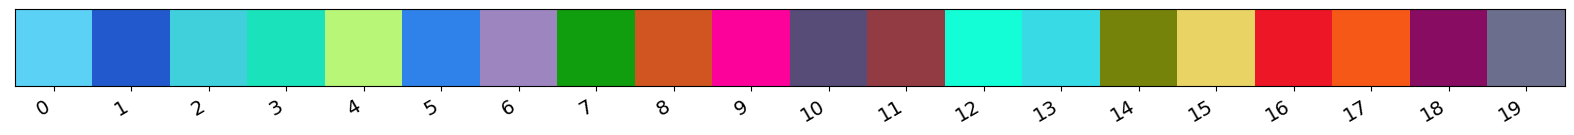

In [73]:
# OPTIONAL

# This function provides a random color palette - If you want a specific color for your neighborhoods, just provide a list of color
# provide a list with names colors are mapped on (usually cell types, categories or neighborhoods)
neighb_names = cells_df['neigh_num'].unique()

# provide a list of colors (same length as names list) or generate a random collection of colors
neighb_colors = generate_random_colors(n = len(neighb_names))


# combine both lists into a dictionary 
color_dic_neighb = assign_colors(neighb_names, neighb_colors)

KeyError: 'weight'

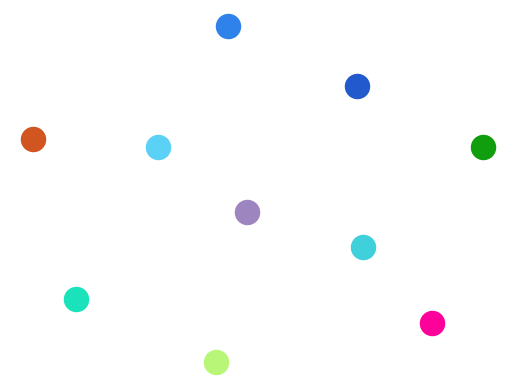

In [77]:
# Visulize CCA
Visulize_CCA_results(CCA_results = stats_group, 
                     save_fig = False, 
                     save_path = output_dir, 
                     save_name = "CCA_vis.png", 
                     p_thresh = 0.05, 
                     colors = color_dic_neighb)

## 4.4) Tensor decomposition

**How does the function work:**
Description from original paper: 
The tensor of CN-cell type distributions for each patient, with dimensions patients x cell types x CNs, was produced by computing the
frequency of each cell type in each CN in the non-follicular compartments (i.e., all CNs except CN-5). This tensor was split along
the patient direction by patient group (CLR and DII). Non-negative Tucker decomposition as implemented in the Tensorly Python package was applied to each tensor (Kossaifi et al., 2019). The ranks in each dimension (2,6,6) were selected by a visual elbow point
method assessing the decomposition loss (Figure S6C). Several random-starts were utilized to ensure stability.
The cell type modules correspond to the factors in cell-type space. The CN modules correspond to the factors in CN space. The
interactions comprising a tissue module correspond to each 6x6 slice of the 2x6x6 core tensor.
    
**What is the biological meaning of this analysis:**
From the original publication: 

We motivate our use of tensor methods for describing differences in the variation across patients’ joint CNCT
compositions by discussing the limitations of traditional PCA for this purpose. One possibility for describing
the differences, between patient groups, in variation across patients’ joint CN-CT compositions, would have been
to first perform PCA (by flattening each patient’s 2D matrix to a 1D vector), and subsequently describe how the
identified axes were different. However, this would have eliminated the information that CNs and CTs form two
distinct but coupled views of the iTME. This coupling corresponds exactly to the fact that the underlying biological
programs drive multiple distinct CTs to be found together in multiple distinct CNs. For example, multiple CTs
might share combinations of cytokine receptors, and cytokine gradients might promote combinations of CNs.
An example which illustrates how underlying biology could give rise to the tensor decomposition output is
depicted as a schematic in the Figure below: (1) The tissue is formed by the interaction of CN ‘recruitment factors’
(for example, cytokines) shared by multiple CNs to recruit cell types by interacting with cognate ‘cellular
localization factors’ (for example, cytokine receptors) shared by multiple cell types (Panel 1, top aspect). The term
factor should be viewed in a statistical sense and could represent more complicated programs than a single ligand
or receptor. Different factors can interact to different extents (Panel 1, lower aspect). (2) Different interacting pairs
of recruitment and localization factors are found together in the tissue, giving rise to the observed distribution of
CNs and cell types (Panel 2). In the left region, the blue and red CNs share a recruitment factor (heart-shaped
indentation), so share a common cell type (green) with a cognate localization factor (heart). In the right region, the
orange and the gray cells share a localization factor (circle), so are found in multiple CNs. The green CN uses
multiple recruitment factors, one shared with the yellow CN. Distinct interacting pairs of recruitment and
localization factors co-occur across patients (red and blue found together, and yellow and green found together),
each co-occurring collection of interacting pairs corresponding to a tissue module. These recruitment and
localization factors are inferred from the tensor decomposition output, visualized as tissue modules comprised of
CN modules and cell type (CT) modules, with interactions between them represented as edges (Panel 3). Note that
there is a common collection of CT modules and CN modules that are present to different extents in each tissue
module. The contribution of each CN module and CT module to each tissue module is represented by its shading
(Panel 3). In tissue module 1 (top box), the CN module in the first row is interpreted as the recruitment factor with
a circular indentation. This is because it contains yellow and green CNs, and there is a strong edge with the CT
module containing the orange and grey cell types, and a weak edge with the CT module containing the blue cell
type. The CN module with just the green CN (row 2) is interpreted as the recruitment factor with the square
indentation. This is because that CN module does not contain any other CNs and has only one edge with one CT
module containing the blue cell type. Since the red and green CNs are not found in the same patients, the CN module
with the red and blue CNs and its cognate CT module with just the green cell type are faint in tissue module 1 and
form tissue module 2. Note that the CN modules and the cell type modules are identified by their mutual
dependence.

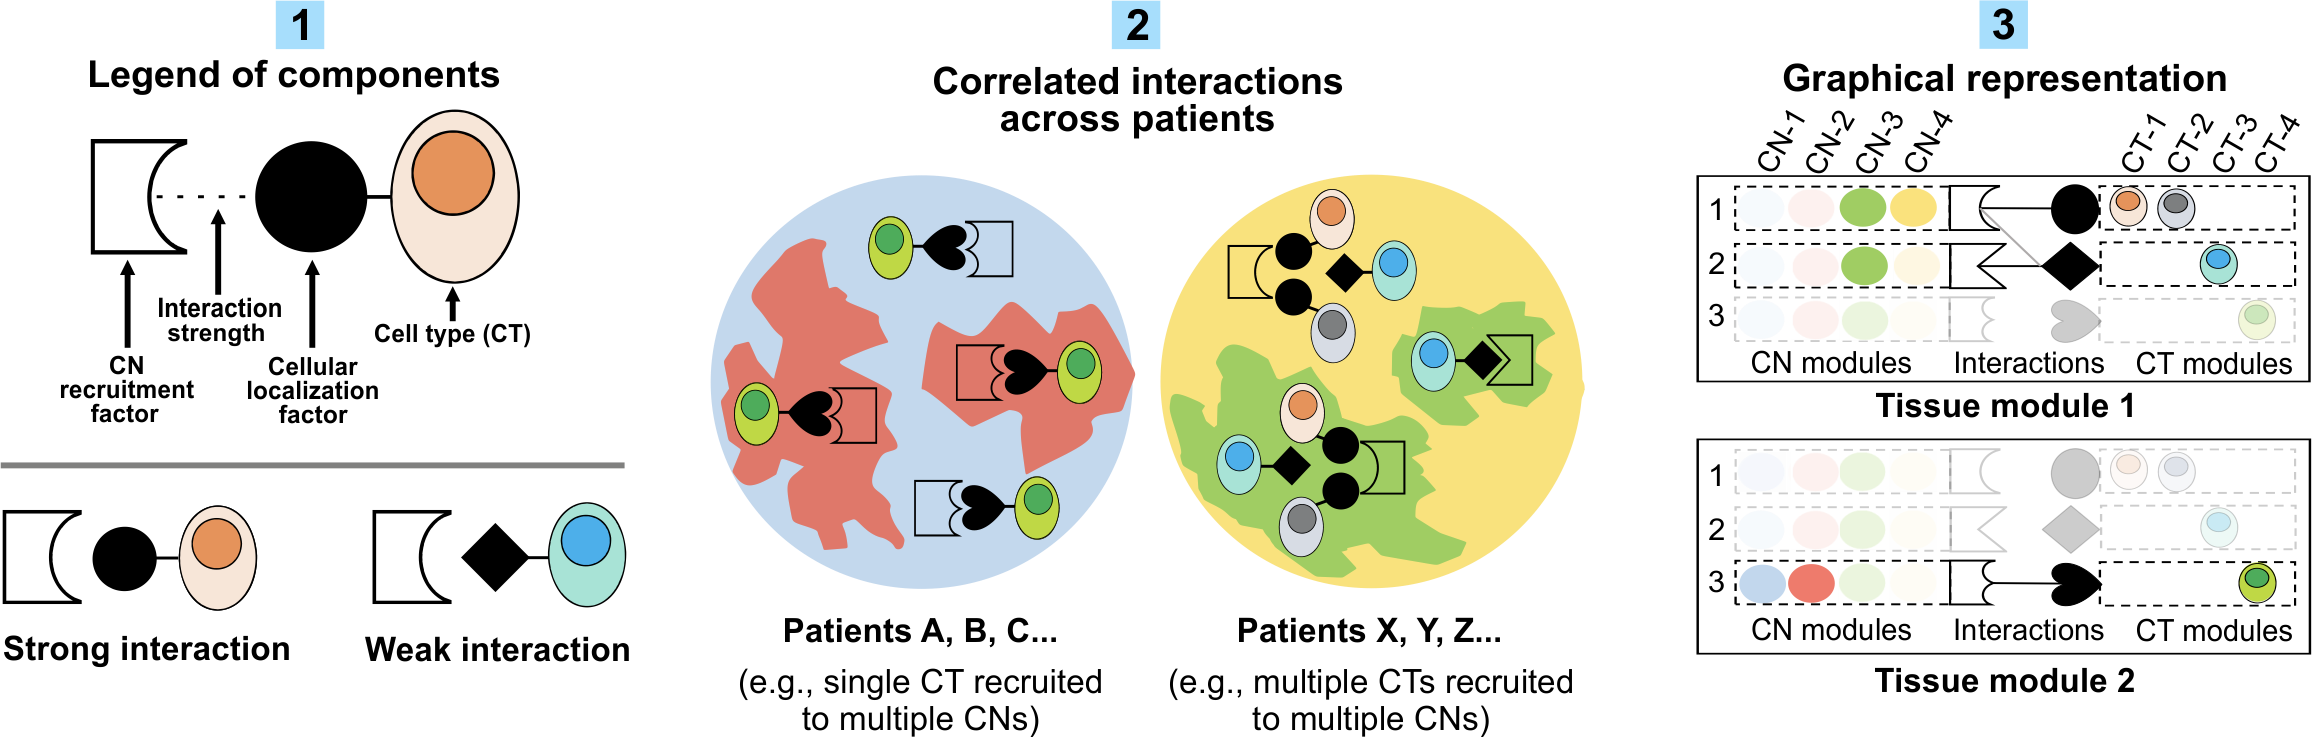

Schematic illustrating the interpretation of the tensor decomposition output. (1) Legend of components: A CN
module corresponds to a cell recruitment program utilized by the CNs comprising that module, and a CT module
corresponds to a cell type localization program utilized by the cell types comprising that module. Different pairs of
recruitment programs and localization programs interact to different strengths. (2) Different pairs of interacting
recruitment programs and localization programs co-occur to form the tissue through balanced interactions between
recruitment and localization factors. These combinations yield similar combinations of CNs and cell types within
them across patients. (3) Graphical representation of tissue modules corresponding to combinations of interacting
pairs, indicated by edges, of CN modules (left column) and CT modules (right column). CN modules and CT
modules are common across both tissue modules. In each tissue module, the transparency of each CN module and
CT module corresponds to the weight of the maximum edge of which it is part, i.e. indicating its contribution to
that tissue module.

In [ ]:
# Prepare IDs this could for example be the combination of patient ID and tissue type. Apart from that, the function assigns a number to each name from the neighborhood column
cells_df = prepare_neighborhood_df(cells_df, 
                                   neighborhood_column = neighborhood_col, 
                                   patient_ID_component1 = ID_component1, 
                                   patient_ID_component2 = ID_component2) # this is a helper function 

In [ ]:
# devide IDs/patients into groups
patient_to_group_dict = cells_df.loc[:,['patients',ID_component2]].drop_duplicates().set_index('patients').to_dict()[ID_component2]
group1_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=="Biopsy"]
group2_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=='Resection']

# Provide user feedback
print(group1_patients)

list(cells_df['Coarse Cell'].unique())
list(cells_df['neigh_num'].unique())

# select the cts
cts = list(cells_df['Coarse Cell'].unique()) # In theory you could select all cell types 
#cts =['Macrophage CD169+',   # It is very likely that a user wants to select specific cell types 
# 'CD4+ T cell',
# 'DC',
# 'Stromal',
#  'Tumor Ki67+',
#  'Tumor PDL1+ MHCI+',
#  'Tumor',
# 'Macrophage',
# 'Neutrophil',
# 'NK',
# 'CD8+ T cell PD1+',
# 'CD8+ T cell',
# 'CD4+ Treg',
# 'B cell']

# select the cns
cns = list(cells_df['neigh_num'].unique())
#cns = [0, 1, 2, 3, 4, 5, 6]


In [ ]:
# Build the tensors for each patient group
counts = cells_df.groupby(['patients','neigh_num','Coarse Cell']).size()

#initialize the tensors

dat1 = build_tensors(df = cells_df, group = group1_patients, cns = cns, cts = cts)
dat2 = build_tensors(df = cells_df, group = group2_patients, cns = cns, cts = cts)

In [ ]:
# The following tries different numbers of CN modules/CT modules to determine suitable rank for decomposition

evaluate_ranks(dat1,2)
plt.show()
evaluate_ranks(dat2,2)
plt.show()

plot_modules_heatmap(dat1, cns, cts)
plot_modules_heatmap(dat2, cns, cts)

# Set a save path MOVE THIS TO TOP OF SCIPT COMBINE WITH OUTPUT 
save_path = '/Users/timnoahkempchen/Downloads/'

pal = sns.color_palette('bright',30) # Choose some random colors to demonstrate that function in working 
plot_modules_graphical(dat1, pal = pal, cns = cns, cts = cts, save_name = 'T cell', save_path = output_dir, scale = 0.4)

# 5) Analysis dependent on community analysis 

## 5.1) Specify additional information

In [ ]:
col_list = cells_df2.columns

# Spatial context 
n_num = 75
ks=[n_num]
cluster_col = 'community'
sum_cols=cells_df2[cluster_col].unique()
keep_cols = col_list
X='x'
Y='y'
Reg = 'unique_region'
Neigh = Neighborhoods(cells_df2,ks,cluster_col,sum_cols,keep_cols,X,Y,reg=Reg,add_dummies=True)
windows = Neigh.k_windows()
Reg = "unique_region"

#Choose the windows size to continue with
w = windows[n_num]

n_neighborhoods=7
n2_name = 'neigh_ofneigh'
k_centroids = {}

km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)
labels = km.fit_predict(w[sum_cols].values)
k_centroids[n_num] = km.cluster_centers_
w[n2_name] = labels

## Spatial context analysis 

**How does the function work:**
    
**What is the biological meaning of this analysis:**

The idea is to map where possible interactions might occur. The basic assumption is that local processes of CNs interact than two or more CNs contact. 
    

In [ ]:
windows, sum_cols = Create_neighborhoods(df = cells_df,
                     n_num = n_num,
                     cluster_col = 'community',
                     X = 'x',
                     Y = 'y',
                     reg = "unique_region",
                     sum_cols = None,
                     keep_cols = None,
                     ks = [n_num])

w, k_centroids = Chose_window_size(windows,
                      n_num = n_num,
                      n_neighborhoods = 10,
                      n2_name = 'neigh_ofneigh', sum_cols = sum_cols)

Niche_heatmap(k_centroids, w, n_num, sum_cols)


names = cells_df2[cluster_col].unique()
colors = generate_random_colors(n = len(names))

color_dic = assign_colors(names, colors)

pal_color=color_dic
l=list(pal_color.keys())



plot_list = list_n = [ 'Atrophic Cardiac Enriched', "Inflamed Stroma", 'Inflamed CK7hi Epithelial']

In [ ]:
Barycentric_coordinate_projection(w, 
                                      plot_list = plot_list, 
                                      threshold = 10, 
                                      output_dir = output_dir, 
                                      save_name = save_name, 
                                      col_dic = color_dic,
                                      l = l,
                                      cluster_col = cluster_col,
                                      n_num = n_num,
                                      SMALL_SIZE = 14, 
                                      MEDIUM_SIZE = 16, 
                                      BIGGER_SIZE = 18)

**CN combination map**

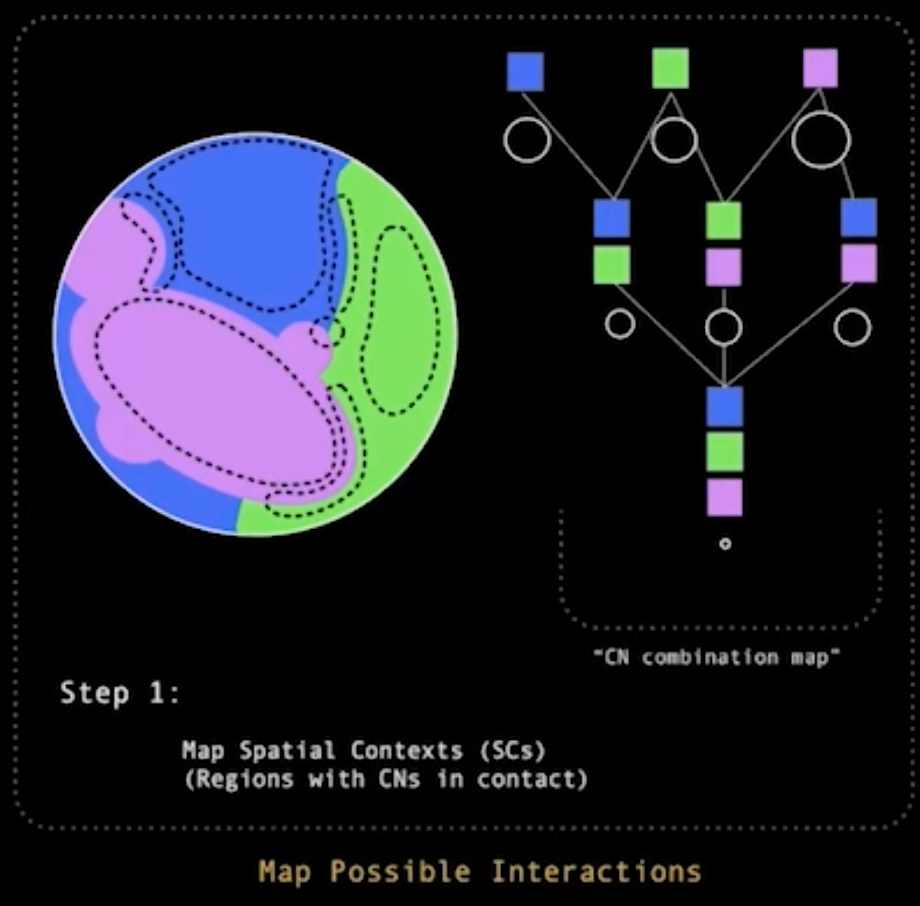

The graph shows differnet combinations of neightborhoods as well as single neighborhoods. The circles indicate the size of this specific modules and edges indicate the relationship of the individual CNs.





This is a Python function that plots a combination map of nodes and edges using the NetworkX and Matplotlib libraries. The function takes in a graph object called g, which is then used to calculate the positions of each node using the graphviz_layout function from the nx.drawing.nx_pydot module. The height variable is set to 8, which appears to determine the vertical spacing between nodes.

The function then sets the figure size to 40x20 using figsize(40,20), and loops through each node in the graph. For each node, the function determines its color based on the number of incoming edges and plots a scatter point with size determined by the value in the simp_freqs list that corresponds to the node. If the node is in the tops list, it is marked with an asterisk. The function then plots squares below the node for each element in the node, with color determined by the palt dictionary.

The function then loops through each edge in the graph and plots a line between the two nodes, with the color and thickness of the line determined by the number of incoming edges to the second node.

Finally, the function turns off the axis labels and displays the plot using plt.show(). The commented-out sections appear to contain code for adding additional information to the plot, such as profiles below each node and highlighting specific edges, but they are not currently being used.

In [ ]:
simps, simp_freqs, simp_sums = calculate_neigh_combs(w, 
                                                     l,
                                                     n_num, 
                                                     threshold = 0.85, 
                                                     per_keep_thres = 0.85)

g, tops, e0, e1 = build_graph_CN_comb_map(simp_freqs)

generate_CN_comb_map(graph = g, 
                     tops = tops, 
                     e0 = e0, 
                     e1 = e1, 
                     l = l,
                     simp_freqs = simp_freqs,
                     color_dic = color_dic)

In [ ]:
get_network(ttl_per_thres=0.9,
            comb_per_thres=0.005,
            neigh_sub = plot_list,
            save_name='All_comm',
            save_path = output_dir,
            sub_col = cluster_col, 
            color_dic = color_dic,
            windows = windows,
            n_num = n_num,
            l = l)

### Statistics

In [ ]:
simp_df_tissue1, simp_df_tissue2 = spatial_context_stats(windows, n_num, total_per_thres = 0.9, \
                      comb_per_thres = 0.005, \
                      tissue_column = 'Block type',\
                      subset_list = ["Resection"],\
                      plot_order = ['Resection','Biopsy'],\
                      pal_tis = {'Resection':'blue','Biopsy':'orange'},\
                      patient_ID_component1 = ID_component1, \
                      patient_ID_component2 = ID_component2,\
                      subset_list_tissue1 = ["Resection"],\
                      subset_list_tissue2 = ["Biopsy"])
    
print(simp_df_tissue1["combination"].values)  
print(simp_df_tissue2["combination"].values)     
     
simp_df_tissue1 = simp_df_tissue1.set_index("combination")
simp_df_tissue2 = simp_df_tissue2.set_index("combination")
    
spatial_context_stats_vis(neigh_comb = (9,),
                              simp_df_tissue1 = simp_df_tissue1,
                              simp_df_tissue2 = simp_df_tissue2,
                              pal_tis = {'Resection': 'blue', 'Biopsy': 'orange'},
                              plot_order = ['Resection', 'Biopsy'])

In [ ]:
input_file = "/Volumes/homes/admin/Marc/Annotations_U54_01_2023/neighborhoods/2023_03_19_PT_LN_sep_neighborhoods_k20_n10_windows_incl._neighborhood_names_unique_region.csv"
cells_df2 = pd.read_csv(input_file) 

In [ ]:
cells_df2.columns.values

In [ ]:
cells_df2 = cells_df2[cells_df2['neighb_names'].str.contains("LN")]
cells_df2 = cells_df2.reindex()

In [ ]:
cells_df2['neighb_names'].values

In [ ]:
col_list = cells_df2.columns

# Spatial context 
n_num = 75
ks=[n_num]
cluster_col = 'neighb_names'
sum_cols=cells_df2[cluster_col].unique()
keep_cols = col_list
X='x'
Y='y'
Reg = 'unique_region'
Neigh = Neighborhoods(cells_df2,ks,cluster_col,sum_cols,keep_cols,X,Y,reg=Reg,add_dummies=True)
windows = Neigh.k_windows()
Reg = "unique_region"

#Choose the windows size to continue with
w = windows[n_num]

n_neighborhoods=7
n2_name = 'neigh_ofneigh'
k_centroids = {}

km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)
labels = km.fit_predict(w[sum_cols].values)
k_centroids[n_num] = km.cluster_centers_
w[n2_name] = labels

In [ ]:
windows, sum_cols = Create_neighborhoods(df = cells_df2,
                     n_num = n_num,
                     cluster_col = 'neighb_names',
                     X = 'x',
                     Y = 'y',
                     reg = "unique_region",
                     sum_cols = None,
                     keep_cols = None,
                     ks = [n_num])

w, k_centroids = Chose_window_size(windows,
                      n_num = n_num,
                      n_neighborhoods = 10,
                      n2_name = 'neigh_ofneigh', sum_cols = sum_cols)

Niche_heatmap(k_centroids, w, n_num, sum_cols)


names = cells_df2[cluster_col].unique()
colors = generate_random_colors(n = len(names))

color_dic = assign_colors(names, colors)

pal_color=color_dic
l=list(pal_color.keys())



plot_list = ["PT_tumor_boundary", "PT_immune_CD8T_enr", "PT_plasma"]

In [ ]:

def Barycentric_coordinate_projection(w, 
                                      plot_list, 
                                      threshold, 
                                      output_dir, 
                                      save_name, 
                                      col_dic, 
                                      l,
                                      n_num,
                                      cluster_col,
                                      SMALL_SIZE = 14, 
                                      MEDIUM_SIZE = 16, 
                                      BIGGER_SIZE = 18):
    
    #Settings for graph
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    lmap = {j:i for i,j in enumerate(l)}
    palt=col_dic
    
    wgc  = w.loc[w.loc[:,plot_list].sum(axis=1)>threshold,:]
    idx = wgc.index.values
    xl = wgc.loc[:,plot_list]
    proj = np.array([[0,0],[np.cos(np.pi/3),np.sin(np.pi/3)], [1,0]])
    coords = np.dot(xl/n_num,proj) #####window size fraction
    
    plt.figure(figsize=(14,14))
    jit = .002
    cols = [palt[a] for a in wgc[cluster_col]]
    
    plt.scatter(coords[:,0]+jit*np.random.randn(len(coords)),coords[:,1]+jit*np.random.randn(len(coords)),s = 1,alpha = .5, c = cols)
    plt.axis('off')
    plt.show()
    
    if save_name:
        plt.savefig(output_dir+save_name+'.png', format='png',\
                    dpi=300, transparent=True, bbox_inches='tight')
        


In [ ]:
Barycentric_coordinate_projection(w, 
                                      plot_list = plot_list, 
                                      threshold = 50, 
                                      output_dir = output_dir, 
                                      save_name = "popel_map", 
                                      col_dic = color_dic,
                                      l = l,
                                      cluster_col = cluster_col,
                                      n_num = n_num,
                                      SMALL_SIZE = 14, 
                                      MEDIUM_SIZE = 16, 
                                      BIGGER_SIZE = 18)

In [ ]:


def calculate_neigh_combs(w, l, n_num, threshold = 0.85, per_keep_thres = 0.85):
    w.loc[:,l]

    #need to normalize by number of neighborhoods or k chosen for the neighborhoods
    xm = w.loc[:,l].values/n_num


    # Get the neighborhood combinations based on the threshold
    simps = get_thresh_simps(xm, threshold)
    simp_freqs = simps.value_counts(normalize = True)
    simp_sums = np.cumsum(simp_freqs)


    #See the percent to keep threshold or percent of neigbhorhoods that fall above a certain threshold
    test_sums_thres =simp_sums[simp_sums < per_keep_thres]
    test_len = len(test_sums_thres)
    per_values_above = simp_sums[test_len]-simp_sums[test_len-1]
    print(test_len, per_values_above)


    w['combination'] = [tuple(l[a] for a in s) for s in simps]
    w['combination_num'] = [tuple(a for a in s) for s in simps]

    # this shows what proportion (y) of the total cells are assigned to the top x combinations
    #plt.figure(figsize(20,5))
    plt.plot(simp_sums.values)
    plt.title("proportion (y) of the total cells are assigned to the top x combinations")
    plt.show()

    # this shows what proportion (y) of the total cells are assigned to the top x combinations
    #plt.figure(figsize(20,5))
    plt.plot(test_sums_thres.values)
    plt.title("proportion (y) of the total cells are assigned to the top x combinations - thresholded")
    plt.show()
    #plt.xticks(range(0,350,35),range(0,350,35),rotation = 90,fontsize = 10)

    return(simps, simp_freqs, simp_sums)

def build_graph_CN_comb_map(simp_freqs):
    g = nx.DiGraph()
    thresh_cumulative = .95
    thresh_freq = .001
    #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
    selected_simps = simp_freqs[simp_freqs>=thresh_freq].index.values
    selected_simps
    
    
    '''
    this builds the graph for the CN combination map
    '''
    for e0 in selected_simps:
        for e1 in selected_simps:
            if (set(list(e0))<set(list(e1))) and (len(e1) == len(e0)+1):
                g.add_edge(e0,e1)
                
    tops = simp_freqs[simp_freqs>=thresh_freq].sort_values(ascending = False).index.values.tolist()[:20]
    
    return(g, tops, e0, e1)

def generate_CN_comb_map(graph, tops, e0, e1, l, simp_freqs, color_dic):
        
    draw = graph
    pos = nx.drawing.nx_pydot.graphviz_layout(draw, prog='dot')
    height = 8
    
    
    plt.figure(figsize=(40,20))
    for n in draw.nodes():
        col = 'black'
        if len(draw.in_edges(n))<len(n):
            col = 'black'
        plt.scatter(pos[n][0],pos[n][1]-5, s = simp_freqs[list(simp_freqs.index).index(n)]*10000, c = col, zorder = -1)
        if n in tops:
            plt.text(pos[n][0],pos[n][1]-7, '*', fontsize = 25, color = 'white', ha = 'center', va = 'center',zorder = 20)
        delta = 8
        #plot_sim((pos[n][0]+delta, pos[n][1]+delta),n, scale = 20,s = 200,text = True,fontsize = 15)
        plt.scatter([pos[n][0]]*len(n),[pos[n][1]+delta*(i+1) for i in range(len(n))],c = [color_dic[l[i]] for i in n] ,marker = 's', zorder = 5,s = 400)
        
    #     #add profiles below node
    #     x = pos[n][0]
    #     y = pos[n][1]
    #     y = y-height*2
    #     standard_node_size =  16
    #     node_heights = [0,3,8,5,3,2,1,5]
    #     marker_colors = ['red','red','blue','blue','red','red','blue','blue']
        
    #     plt.plot([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = 'red',zorder =3)#,s = v*2 ,c= c,edgecolors='black',lw = 1)
    #     plt.scatter([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = marker_colors,s = standard_node_size,zorder = 4)
        
            
    j = 0
    for e0,e1 in draw.edges():
        weight = 0.2
        alpha = .3
        color='black'
        if len(draw.in_edges(e1))<len(e1):
            color = 'black'
            lw =1
            weight = 0.4
            
    #     if (e0,e1) in set(draw.out_edges(tuple(sorted([lmap['3'],lmap['1']])))):
    #         j+=1
    #         print(j)
    #         color = 'green'
    #         weight = 2
    #         alpha = 1
            
    #     if (lmap['3'] in e0) and (lmap['1'] not in e0) and (lmap['1'] in e1):
    #         color = 'green'
    #         weight = 2
    #         alpha = 1
    
        plt.plot([pos[e0][0], pos[e1][0]],[pos[e0][1], pos[e1][1]], color = color, linewidth = weight,alpha = alpha,zorder = -10)
    
    plt.axis('off')
    #plt.savefig('CNM.pdf')
    plt.show()



In [ ]:
simps, simp_freqs, simp_sums = calculate_neigh_combs(w, 
                                                     l,
                                                     n_num, 
                                                     threshold = 0.85, 
                                                     per_keep_thres = 0.85)

g, tops, e0, e1 = build_graph_CN_comb_map(simp_freqs)

generate_CN_comb_map(graph = g, 
                     tops = tops, 
                     e0 = e0, 
                     e1 = e1, 
                     l = l,
                     simp_freqs = simp_freqs,
                     color_dic = color_dic)

In [ ]:
get_network(ttl_per_thres=0.9,
            comb_per_thres=0.005,
            neigh_sub = plot_list,
            save_name='All_comm',
            save_path = output_dir,
            sub_col = cluster_col, 
            color_dic = color_dic,
            windows = windows,
            n_num = n_num,
            l = l)

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 25 12:43:45 2023

@author: timnoahkempchen
"""

# load required packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import sys
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
import plotnine
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math

from sklearn.cluster import MiniBatchKMeans
import scanpy as sc
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from sklearn.cross_decomposition import CCA
import networkx as nx
from scipy.stats import pearsonr,spearmanr
from scipy.spatial.distance import cdist
#import graphviz
from tensorly.decomposition import non_negative_tucker
import tensorly as tl
import itertools
from functools import reduce
import os as os


# load functions 
def stacked_bar_plot(data, per_cat, grouping, cell_list, output_dir,norm=True, save_name=None,\
              col_order=None, sub_col=None, name_cat = 'Cell Type',fig_sizing=(8,4),\
                     h_order=None, pal_color=None,remove_leg=False):
    
    #Find Percentage of cell type
    if norm==True:
        if sub_col is None:
            test1 = data.loc[data[per_cat].isin(cell_list)]
            sub_cell_list = list(test1[per_cat].unique())
        else:
            test1 = data.loc[data[sub_col].isin(cell_list)]
            sub_cell_list = list(test1[per_cat].unique())
    else:
        if sub_col is None:
            test1 = data.copy()
            sub_cell_list = list(data.loc[data[per_cat].isin(cell_list)][per_cat].unique())
        else:
            test1 = data.copy()
            sub_cell_list = list(data.loc[data[sub_col].isin(cell_list)][per_cat].unique())
            
    test1[per_cat] = test1[per_cat].astype('category')
    test_freq = test1.groupby(grouping).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100)
    test_freq.columns = test_freq.columns.astype(str)
    
    ##### Can subset it here if I do not want normalized per the group
    test_freq.reset_index(inplace=True)
    sub_cell_list.append(grouping)
    test_freq = test_freq[sub_cell_list]
    melt_test = pd.melt(test_freq, id_vars=[grouping])#, value_vars=test_freq.columns)
    melt_test.rename(columns = {per_cat: name_cat, 'value':'percent'},  inplace = True)
    
    if norm==True:
        if col_order is None:
            bb = melt_test.groupby([grouping, per_cat]).sum().reset_index()
            col_order = bb.loc[bb[per_cat]==bb[per_cat][0]].sort_values(by='percent')[grouping].to_list()
    else:    
        if col_order is None:
            col_order = melt_test.groupby(grouping).sum().reset_index().sort_values(by='percent')[grouping].to_list()
    
    if h_order is None:
        h_order = list(melt_test[per_cat].unique()) 
    
    #Set up for plotting
    melt_test_piv = pd.pivot_table(melt_test, columns = [name_cat], index=[grouping], values=['percent'])
    melt_test_piv.columns = melt_test_piv.columns.droplevel(0)
    melt_test_piv.reset_index(inplace=True)
    melt_test_piv.set_index(grouping, inplace=True)
    melt_test_piv = melt_test_piv.reindex(col_order)
    melt_test_piv = melt_test_piv[h_order]
    
    #Get color dictionary 
    if pal_color is None:
        #first subplot
        ax1 = melt_test_piv.plot.bar(alpha = 0.8, linewidth=1,\
                                    figsize =fig_sizing, rot=90,stacked=True, edgecolor='black')

    else: 
        #first subplot
        ax1 = melt_test_piv.plot.bar(alpha = 0.8, linewidth=1, color=[pal_color.get(x) for x in melt_test_piv.columns],\
                                    figsize =fig_sizing, rot=90,stacked=True, edgecolor='black')

    for line in ax1.lines:
        line.set_color('black')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    if remove_leg==True:
        ax1.set_ylabel('')
        ax1.set_xlabel('')
    else:
        ax1.set_ylabel('percent')
    #ax1.spines['left'].set_position(('data', 1.0))
    #ax1.set_xticks(np.arange(1,melt_test.day.max()+1,1))
    #ax1.set_ylim([0, int(ceil(max(max(melt_test_piv.sum(axis=1)), max(tm_piv.sum(axis=1)))))])
    plt.xticks(list(range(len(list(melt_test_piv.index)))), list(melt_test_piv.index), rotation=90)
    lgd2 = ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
    if save_name:
        plt.savefig(output_dir+save_name+'.png', format='png',\
                    dpi=300, transparent=True, bbox_inches='tight')
    return melt_test_piv, h_order  


##########################################################################################################
# This function creates a box plot and swarm plot from the given data
# and returns a plot object.

def swarm_box(data, grouping, replicate, sub_col, sub_list, per_cat, output_dir, norm=True,\
              figure_sizing=(10,5), save_name=None, h_order=None, col_in=None, \
              pal_color=None, flip=False):
       
    #Find Percentage of cell type
    test= data.copy()
    sub_list1 = sub_list.copy()
    
    if norm==True:
        test1 = test.loc[test[sub_col].isin(sub_list1)]
        immune_list = list(test1[per_cat].unique())
    else:
        test1=test.copy()
        immune_list = list(test.loc[test[sub_col].isin(sub_list1)][per_cat].unique())
    
    test1[per_cat] = test1[per_cat].astype('category')
    test_freq = test1.groupby([grouping,replicate]).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100)
    test_freq.columns = test_freq.columns.astype(str)
    test_freq.reset_index(inplace=True)
    immune_list.extend([grouping,replicate])
    test_freq1 = test_freq[immune_list]

    melt_per_plot = pd.melt(test_freq1, id_vars=[grouping,replicate,])#,value_vars=immune_list)
    melt_per_plot.rename(columns={'value': 'percentage'}, inplace=True)
    
    if col_in:
        melt_per_plot = melt_per_plot.loc[melt_per_plot[per_cat].isin(col_in)]
    else:
        melt_per_plot = melt_per_plot
    
    #Order by average
    plot_order = melt_per_plot.groupby(per_cat).mean().reset_index().sort_values(by='percentage')[per_cat].to_list()

    if h_order is None:
        h_order = list(melt_per_plot[grouping].unique()) 
    
    
    #swarmplot to compare clustering
    plt.figure(figsize=figure_sizing)
    if flip==True:
        plt.figure(figsize=figure_sizing)
        if pal_color is None:
            ax = sns.boxplot(data = melt_per_plot, x=grouping,  y='percentage',  dodge=True, order=h_order)
            ax = sns.swarmplot(data = melt_per_plot, x=grouping, y='percentage', dodge=True,order=h_order,\
                           edgecolor='black',linewidth=1, color="white")
        else:
            ax = sns.boxplot(data = melt_per_plot, x=grouping,  y='percentage',  dodge=True,order=h_order, \
                         palette=pal_color)
            ax = sns.swarmplot(data = melt_per_plot, x=grouping, y='percentage', dodge=True,order=h_order,\
                           edgecolor='black',linewidth=1, palette=pal_color)
    
        for patch in ax.artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .3))
        plt.xticks(rotation=90)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(sub_list[0])
        sns.despine()
        
    else:
        if pal_color is None:
            ax = sns.boxplot(data = melt_per_plot, x=grouping,  y='percentage',  dodge=True, order=h_order)
            ax = sns.swarmplot(data = melt_per_plot, x=grouping, y='percentage', dodge=True,order=h_order,\
                           edgecolor='black',linewidth=1, color="white")
        else:
            ax = sns.boxplot(data = melt_per_plot, x=grouping,  y='percentage',  dodge=True,order=h_order, \
                         palette=pal_color)
            ax = sns.swarmplot(data = melt_per_plot, x=grouping, y='percentage', dodge=True,order=h_order,\
                           edgecolor='black',linewidth=1, palette=pal_color)
        for patch in ax.artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .3))
        #ax.set_yscale(\log\)
        plt.xlabel('')
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[:len(melt_per_plot[grouping].unique())], labels[:len(melt_per_plot[grouping].unique())],\
                   bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
        plt.xticks(rotation=90)

        ax.set(ylim=(0,melt_per_plot['percentage'].max()+1))
        sns.despine()
    
    if output_dir:
        if save_name:
            plt.savefig(output_dir+save_name+'_swarm_boxplot.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
        else:
            print("define save_name")
    else: 
        print("plot was not saved - to save the plot specify an output directory")
    return melt_per_plot



##########################################################################################################

# function
# calculates diversity of cell types within a sample 
def Shan_div(data, sub_l, group_com, per_categ, rep, sub_column, coloring, output_dir, normalize=True, save=False, \
             ordering=None, fig_size=1.5):
    #calculate Shannon Diversity
    tt = per_only1(data = data, per_cat = per_categ, grouping = group_com,\
              sub_list=sub_l, replicate=rep, sub_col = sub_column, norm=normalize)
    tt['fraction']= tt['percentage']/100
    tt['Shannon']=tt['fraction']*np.log(tt['fraction'])
    tt.fillna(0,inplace=True)
    sdiv = tt.groupby([rep,group_com]).agg({'Shannon': 'sum'})
    res = sdiv.reset_index()
    res['Shannon Diversity'] = res['Shannon']*-1

    #Run Anova on results
    res_dict = {}
    for treat in list(res[group_com].unique()):
        res_dict[treat] = res.loc[res[group_com]==treat]['Shannon Diversity']

    treat_list = []
    if len(res_dict) > 1:
        for treat in res_dict.keys():
            treat_list.append(res_dict[treat])
        test_results=stats.f_oneway(*treat_list)[1]
    else:
        test_results=stats.f_oneway(res_dict[treat][0])[1]

        
    #Order by average
    if coloring is None:
        if ordering is None:
            plot_order = res.groupby(group_com).mean().reset_index().sort_values(by='Shannon Diversity')[group_com].to_list()    
        else:
            plot_order=ordering
        #Plot the swarmplot of results
        plt.figure(figsize=(fig_size,3))

        ax = sns.boxplot(data = res, x=group_com,  y='Shannon Diversity',  dodge=True, order=plot_order)
                        
        ax = sns.swarmplot(data = res, x=group_com, y='Shannon Diversity', dodge=True, order=plot_order,\
                        edgecolor='black',linewidth=1, color="white")
    
    else:
        if ordering is None:
            plot_order = res.groupby(group_com).mean().reset_index().sort_values(by='Shannon Diversity')[group_com].to_list()    
        else:
            plot_order=ordering
        #Plot the swarmplot of results
        plt.figure(figsize=(fig_size,3))

        ax = sns.boxplot(data = res, x=group_com,  y='Shannon Diversity',  dodge=True, order=plot_order, \
                        palette=coloring)
        ax = sns.swarmplot(data = res, x=group_com, y='Shannon Diversity', dodge=True, order=plot_order,\
                        edgecolor='black',linewidth=1, palette=coloring)

    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.ylabel('Shannon Diversity')
    plt.title('')
    sns.despine()
    if save==True:
        plt.savefig(output_dir+sub_l[0]+'_Shannon.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
    
    plt.show()
    if test_results < 0.05:
        plt.figure(figsize=(fig_size,fig_size))
        tukey = pairwise_tukeyhsd(endog=res['Shannon Diversity'],
                              groups=res[group_com],
                              alpha=0.05)
        tukeydf = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        tukedf_rev = tukeydf.copy()
        tukedf_rev.rename(columns={'group1':'groupa','group2':'groupb'}, inplace=True)
        tukedf_rev.rename(columns={'groupa':'group2','groupb':'group1'}, inplace=True)
        tukedf_rev=tukedf_rev[tukeydf.columns]
        tukey_all = pd.concat([tukedf_rev,tukeydf])

        #Plot with tissue order preserved
        table1 = pd.pivot_table(tukey_all, values='p-adj', index=['group1'],
                            columns=['group2'])
        table1=table1[plot_order]
        table1=table1.reindex(plot_order)

        #plt.figure(figsize = (5,5))
        ax=sns.heatmap(table1, cmap='coolwarm',center=0.05,vmax=0.05)
        ax.set_title('Shannon Diversity') 
        ax.set_ylabel('')    
        ax.set_xlabel('')
        if save==True:    
            plt.savefig(output_dir+sub_l[0]+'_tukey.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
        plt.show()
    else:
        table1=False
    return tt, test_results, table1


##########################################################################################################
def cell_type_composition_vis(data, sample_column = "sample", cell_type_column = "Cell Type", output_dir = None):
    
    if output_dir == None:
        print("You have defined no output directory!")
    
    #plotting option1
    #pd.crosstab(df['sample'], df['final_cell_types']).plot(kind='barh', stacked=True,figsize = (10,12))
    #plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #plt.show()
    

    #plotting option2
    ax = pd.crosstab(data[sample_column], data[cell_type_column]).plot(kind='barh', stacked=True,figsize = (10,10))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    fig = ax.get_figure()
    ax.set(xlabel='count')
    plt.savefig(output_dir +'/cell_types_composition_hstack.png', bbox_inches='tight')

    #plotting option1
    #pd.crosstab(df['sample'], df['final_cell_types']).plot(kind='barh', figsize = (10,10))
    #plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #plt.show()

    #plotting option2
    ax = pd.crosstab(data[sample_column], data[cell_type_column]).plot(kind='barh', stacked=False,figsize = (10,10))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    fig = ax.get_figure()
    ax.set(xlabel='count')
    plt.savefig(output_dir +'/cell_types_composition_hUNstack.png', bbox_inches='tight')

    # Cell type percentage 
    st = pd.crosstab(data[sample_column], data[cell_type_column])
    df_perc=(st/np.sum(st, axis = 1)[:,None])* 100
    df_perc
    #df_perc['sample'] = df_perc.index
    #df_perc

    tmp=st.T.apply(
    lambda x: 100 * x / x.sum()
    )

    ax = tmp.T.plot(kind='barh', stacked=True,figsize = (10,10))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    fig = ax.get_figure()
    ax.set(xlabel='percentage')
    plt.savefig(output_dir +'/cell_types_composition_perc_hstack.png', bbox_inches='tight')


##########################################################################################################
def neighborhood_analysis(data, values, sum_cols, X = 'x', Y = 'y', reg = 'unique_region', cluster_col = 'Cell Type', ks = [20, 30, 35], output_dir = None, k = 35, n_neighborhoods = 30, save_to_csv = False, plot_specific_neighborhoods = None ):

    cells = data.copy()

    neighborhood_name = "neighborhood"+str(k)

    keep_cols = [X ,Y ,reg,cluster_col]

    n_neighbors = max(ks)

    cells[reg] = cells[reg].astype('str')

    #Get each region
    tissue_group = cells[[X,Y,reg]].groupby(reg)
    exps = list(cells[reg].unique())
    tissue_chunks = [(time.time(),exps.index(t),t,a) for t,indices in tissue_group.groups.items() for a in np.array_split(indices,1)] 

    tissues = [get_windows(job, n_neighbors, exps= exps, tissue_group = tissue_group, X = X, Y = Y) for job in tissue_chunks]

    #Loop over k to compute neighborhoods
    out_dict = {}
    for k in ks:
        for neighbors,job in zip(tissues,tissue_chunks):

            chunk = np.arange(len(neighbors))#indices
            tissue_name = job[2]
            indices = job[3]
            window = values[neighbors[chunk,:k].flatten()].reshape(len(chunk),k,len(sum_cols)).sum(axis = 1)
            out_dict[(tissue_name,k)] = (window.astype(np.float16),indices)
            
    windows = {}
    for k in ks:
    
        window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
        window = window.loc[cells.index.values]
        window = pd.concat([cells[keep_cols],window],1)
        windows[k] = window

    #Fill in based on above
    k_centroids = {}

    #producing what to plot
    windows2 = windows[k]
    windows2[cluster_col] = cells[cluster_col]

    km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)

    labels = km.fit_predict(windows2[sum_cols].values)
    k_centroids[k] = km.cluster_centers_
    cells[neighborhood_name] = labels

    #modify figure size aesthetics for each neighborhood
    figs = catplot(cells,X = X,Y=Y,exp = reg,hue = 'neighborhood'+str(k),invert_y=True,size = 5,)
    if save_to_csv is True:
        cells.to_csv(output_dir + 'neighborhood.csv')
        
    else: 
        print("results will not be stored as csv file")

    #Save Plots for Publication
    for n,f in enumerate(figs):
        f.savefig(output_dir+'neighborhood_'+str(k)+'_id{}.png'.format(n))

    #this plot shows the types of cells (ClusterIDs) in the different niches (0-9)
    k_to_plot = k
    niche_clusters = (k_centroids[k_to_plot])
    tissue_avgs = values.mean(axis = 0)
    fc = np.log2(((niche_clusters+tissue_avgs)/(niche_clusters+tissue_avgs).sum(axis = 1, keepdims = True))/tissue_avgs)
    fc = pd.DataFrame(fc,columns = sum_cols)
    s=sns.clustermap(fc, vmin =-3,vmax = 3,cmap = 'bwr')
    s.savefig(output_dir+"celltypes_perniche_"+"_"+str(k)+".png", dpi=600)

    if plot_specific_neighborhoods is True:
        #this plot shows the types of cells (ClusterIDs) in the different niches (0-9)
        k_to_plot = k
        niche_clusters = (k_centroids[k_to_plot])
        tissue_avgs = values.mean(axis = 0)
        fc = np.log2(((niche_clusters+tissue_avgs)/(niche_clusters+tissue_avgs).sum(axis = 1, keepdims = True))/tissue_avgs)
        fc = pd.DataFrame(fc,columns = sum_cols)
        s=sns.clustermap(fc.iloc[plot_specific_neighborhoods,:], vmin =-3,vmax = 3,cmap = 'bwr')
        s.savefig(output_dir+"celltypes_perniche_"+"_"+str(k)+".png", dpi=600)
    
    return(cells)


##########################################################################################################

def xycorr(df, sample_col, y_rows, x_columns, X_pix, Y_pix):
    
    #Make a copy for xy correction
    df_XYcorr = df.copy()
    
    df_XYcorr["Xcorr"] = 0
    df_XYcorr["Ycorr"] = 0
    
    for sample in df_XYcorr[sample_col].unique():
        df_sub = df_XYcorr.loc[df_XYcorr[sample_col]==sample]
        region_num = df_sub.region.max().astype(int)

        #first value of tuple is y and second is x
        d = list(product(range(0,y_rows,1),range(0,x_columns,1)))
        e = list(range(1,region_num+1,1))
        dict_corr = {}
        dict_corr = dict(zip(e, d)) 

        #Adding the pixels with the dictionary
        for x in range(1,region_num+1,1):
            df_XYcorr["Xcorr"].loc[(df_XYcorr["region"]== x)&(df_XYcorr[sample_col]==sample)] = df_XYcorr['x'].loc[(df_XYcorr['region']==x)&(df_XYcorr[sample_col]==sample)] +dict_corr[x][1]*X_pix

        for x in range(1,region_num+1,1):
            df_XYcorr["Ycorr"].loc[(df_XYcorr["region"]== x)&(df_XYcorr[sample_col]==sample)] = df_XYcorr['y'].loc[(df_XYcorr['region']==x)&(df_XYcorr[sample_col]==sample)] +dict_corr[x][0]*Y_pix

    return df_XYcorr


##########################################################################################################

'''
data: Pandas data frame which is used as input for plotting.


group1: Categorical column in data that will be used as the x-axis in the pairplot.

per_cat: Categorical column in data that will be used to calculate the correlation between categories in group1.

sub_col (optional): Categorical column in data that is used to subset the data.

sub_list (optional): List of values that is used to select a subset of data based on the sub_col.

norm (optional): Boolean that determines if the data should be normalized or not.

group2 (optional): Categorical column in data that is used to group the data.

count (optional): Boolean that determines if the count of each category in per_cat should be used instead of the percentage.

plot_scatter (optional): Boolean that determines if the scatterplot should be plotted or not.

cor_mat: Output data frame containing the correlation matrix.

mp: Output data frame containing the pivot table of the count or percentage of each category in per_cat based on group1.


Returns:
cor_mat (pandas dataframe): Correlation matrix.
mp (pandas dataframe): Data after pivoting and grouping.
'''

def cor_plot(data, group1,per_cat, sub_col=None,sub_list=None,norm=False,\
             group2=None, count=False, plot_scatter=True):
    if group2:
        plt.rcParams["legend.markerscale"] = 1
        tf = data.groupby([group1,group2]).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100).to_frame()
        tf.columns = tf.columns.astype(str)
        tf.reset_index(inplace=True)
        mp = pd.pivot_table(tf, columns = ['level_2'], index=[group1,group2], values=[per_cat])
        mp.columns = mp.columns.droplevel(0)
        mp.reset_index(inplace=True)
        mp2 = mp.fillna(0)
        cor_mat = mp2.corr()
        mask = np.triu(np.ones_like(cor_mat, dtype=bool))
        plt.figure(figsize = (len(cor_mat.index),len(cor_mat.columns)*0.8))
        sns.heatmap(cor_mat, cmap='coolwarm',center=0,vmin=-1,vmax=1,mask=mask)
        if plot_scatter:
            sns.pairplot(mp,diag_kind = 'kde',
                     plot_kws ={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                     size = 4, hue=group2)
    else:
        if count:
                tf = data.groupby([group1,per_cat]).count()['region'].to_frame()
                tf.reset_index(inplace=True)
                mp = pd.pivot_table(tf, columns = [per_cat], index=[group1], values=['region'])
                mp.columns = mp.columns.droplevel(0)
                mp.reset_index(inplace=True)
                mp2 = mp.fillna(0)
                cor_mat = mp2.corr()
                mask = np.triu(np.ones_like(cor_mat, dtype=bool))
                plt.figure(figsize = (len(cor_mat.index),len(cor_mat.columns)*0.8))
                sns.heatmap(cor_mat, cmap='coolwarm',center=0,vmin=-1,vmax=1,mask=mask)
                if plot_scatter:
                    sns.pairplot(mp,diag_kind = 'kde',
                                 plot_kws = {'scatter_kws':{'alpha': 0.6, 's': 80, 'edgecolor': 'k'}},
                                 size = 4, kind='reg')
        else:
            #Find Percentage of cell type
            test= data.copy()
            sub_list1 = sub_list.copy()

            if norm==True:
                test1 = test.loc[test[sub_col].isin(sub_list1)]
                immune_list = list(test1[per_cat].unique())
            else:
                test1=test.copy()
                immune_list = list(test.loc[test[sub_col].isin(sub_list1)][per_cat].unique())

            test1[per_cat] = test1[per_cat].astype('category')
            tf = test1.groupby([group1]).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100)
            tf.columns = tf.columns.astype(str)
            mp = tf[immune_list]
            mp.reset_index(inplace=True)
            cor_mat = mp.corr()
            mask = np.triu(np.ones_like(cor_mat, dtype=bool))
            plt.figure(figsize = (len(cor_mat.index),len(cor_mat.columns)*0.8))
            sns.heatmap(cor_mat, cmap='coolwarm',center=0,vmin=-1,vmax=1,mask=mask)
            if plot_scatter:
                sns.pairplot(mp,diag_kind = 'kde',
                             plot_kws = {'scatter_kws':{'alpha': 0.6, 's': 80, 'edgecolor': 'k'}},
                             size = 4, kind='reg')

        
    return cor_mat, mp


##########################################################################################################

def cor_subset(cor_mat, threshold, cell_type):
    pairs = get_top_abs_correlations(cor_mat,thresh=threshold)
    
    piar1 = pairs.loc[pairs['col1']==cell_type]
    piar2 = pairs.loc[pairs['col2']==cell_type]
    piar=pd.concat([piar1,piar2])
    
    pair_list = list(set(list(piar['col1'].unique())+list(piar['col2'].unique())))
    
    return pair_list, piar, pairs


##########################################################################################################

"""
mp: A pandas dataframe from which a subset of columns will be selected and plotted.
sub_list: A list of column names from the dataframe mp that will be selected and plotted.
save_name (optional): A string that specifies the file name for saving the plot. 
If save_name is not provided, the plot will not be saved.
"""
#def cor_subplot(mp, sub_list,save_name=None):
 #   sub_cor = mp[sub_list]
 #   sns.pairplot(sub_cor,diag_kind = 'kde',
  #                           plot_kws = {'scatter_kws':{'alpha': 0.6, 's': 80, 'edgecolor': 'k'}},
  #                           size = 4, kind='reg', corner=True)
 #   if save_name:
    #    plt.savefig(output_filepath+save_name+'_corrplot.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
#

##########################################################################################################

"""
data: the input pandas data frame.
sub_l2: a list of subcategories to be considered.
per_categ: the categorical column in the data frame to be used.
group2: the grouping column in the data frame.
repl: the replicate column in the data frame.
sub_collumn: the subcategory column in the data frame.
cell: the cell type column in the data frame.
thres (optional): the threshold for the correlation, default is 0.9.
normed (optional): if the percentage should be normalized, default is True.
cell2 (optional): the second cell type column in the data frame.
"""
def corr_cell(data,  sub_l2, per_categ, group2, rep, sub_column, cell,\
              output_dir, save_name, thres = 0.9, normed=True, cell2=None):
    result = per_only1(data = data, per_cat = per_categ, grouping=group2,\
                      sub_list=sub_l2, replicate=rep, sub_col = sub_column, norm=normed)

    #Format for correlation function
    mp = pd.pivot_table(result, columns = [per_categ], index=[group2,rep], values=['percentage'])
    mp.columns = mp.columns.droplevel(0)
    cc = mp.reset_index()
    cmat = cc.corr()

    #Plot
    sl2, pair2, all_pairs = cor_subset(cor_mat=cmat, threshold = thres, cell_type=cell)
    
    if cell2:
        sl3 = [cell2, cell]
        cor_subplot(mp=cc, sub_list=sl3, output_dir = output_dir, save_name=cell+'_'+cell2)
    else:
        cor_subplot(mp=cc, sub_list=sl2, output_dir = output_dir, save_name=cell)
        
    if save_name:
        plt.savefig(output_dir+save_name+'.png', format='png',\
                    dpi=300, transparent=True, bbox_inches='tight')
    
    return all_pairs, pair2

##########################################################################################################

def cor_subplot(mp, sub_list, output_dir, save_name=None):
    sub_cor = mp[sub_list]
    sns.pairplot(sub_cor,diag_kind = 'kde',
                             plot_kws = {'scatter_kws':{'alpha': 0.6, 's': 80, 'edgecolor': 'k'}},
                             size = 4, kind='reg', corner=True)
    if save_name:
        plt.savefig(output_dir+save_name+'_corrplot.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

##########################################################################################################
# Cell type differential enrichment 
def normalize(X):
    arr = np.array(X.fillna(0).values)
    return pd.DataFrame(np.log2(1e-3 + arr/arr.sum(axis =1, keepdims = True)), index = X.index.values, columns = X.columns).fillna(0)


def cell_types_de_helper(df, ID_component1, ID_component2, neighborhood_col, group_col, group_dict, cell_type_col):
    
    # read data 
    cells2 = df
    cells2.reset_index(inplace=True, drop=True)
    cells2
    
    # generate unique ID
    cells2['donor_tis'] = cells2[ID_component1]+'_'+cells2[ID_component2]
    
    # This code is creating a dictionary called neigh_num that maps each unique value 
    #in the Neighborhood column of a pandas DataFrame cells2 to a unique integer index 
    #starting from 0.
    neigh_num = {list(cells2[neighborhood_col].unique())[i]:i for i in range(len(cells2[neighborhood_col].unique()))}
    cells2['neigh_num'] = cells2[neighborhood_col].map(neigh_num)
    cells2['neigh_num'].unique()
    
    '''
    This Python code is performing the following data transformation operations on a pandas DataFrame named cells2:
    The first three lines of code create a dictionary called treatment_dict that maps two specific strings, 'SB' and 'CL', to the integers 0 and 1, respectively. Then, the map() method is used to create a new column called group, where each value in the tissue column is replaced with its corresponding integer value from the treatment_dict dictionary.
    The fourth to seventh lines of code create a new dictionary called pat_dict that maps each unique value in the donor_tis column of the cells2 DataFrame to a unique integer index starting from 0. The for loop loops through the range object and assigns each integer to the corresponding unique value in the donor_tis column, creating a dictionary that maps each unique value to a unique integer index.
    The last two lines of code create a new column called patients in the cells2 DataFrame, where each value in the donor_tis column is replaced with its corresponding integer index from the pat_dict dictionary. This code assigns these integer indices to each patient in the donor_tis column. The unique() method is used to return an array of unique values in the patients column to verify that each unique value in the donor_tis column has been mapped to a unique integer index in the patients column.
    Overall, the code is converting categorical data in the tissue and donor_tis columns to numerical data in the group and patients columns, respectively, which could be useful for certain types of analysis.
    '''
    # Code treatment/group with number
    cells2['group']=cells2[group_col].map(group_dict)
    cells2['group'].unique()
    
    pat_dict = {}
    for i in range(len(list(cells2['donor_tis'].unique()))):
        pat_dict[list(cells2['donor_tis'].unique())[i]] = i
    pat_dict
    
    cells2['patients']=cells2['donor_tis'].map(pat_dict)
    cells2['patients'].unique()
    
    # drop duplicates 
    pat_gp = cells2[['patients','group']].drop_duplicates()
    pat_to_gp= {a:b for a,b in pat_gp.values}
    
    # get cell type (ct) frequences per patient 
    ct_freq1 = cells2.groupby(['patients']).apply(lambda x: x[cell_type_col].value_counts(normalize = True,sort = False)*100)
    #ct_freq = ct_freq1.to_frame()
    ct_freq = ct_freq1.unstack().fillna(0)
    ct_freq.reset_index(inplace=True)
    ct_freq.rename(columns={'level_1':'cell_type', 'Cell Type':'Percentage'}, inplace=True)
    ct_freq
    
    # Get frequences for every neighborhood per patient 
    all_freqs1 = cells2.groupby(['patients','neigh_num']).apply(lambda x: x[cell_type_col].value_counts(normalize = True,sort = False)*100)
    #all_freqs = all_freqs1.to_frame()
    all_freqs = all_freqs1.unstack().fillna(0)
    all_freqs.reset_index(inplace=True)
    all_freqs.rename(columns={'level_2':'cell_type', cell_type_col:'Percentage'}, inplace=True)
    all_freqs
    
    return(cells2, ct_freq, all_freqs, pat_to_gp, neigh_num)


def cell_types_de(ct_freq, all_freqs, neighborhood_num, nbs, patients, group, cells, cells1, neigh_num, output_dir):
    
    # data prep
    # normalized overall cell type frequencies
    X_cts = normalize(ct_freq.reset_index().set_index('patients').loc[patients,cells])
    
    # normalized neighborhood specific cell type frequencies
    df_list = []
    
    for nb in nbs:
        cond_nb = all_freqs.loc[all_freqs[neighborhood_num]==nb,cells1].rename({col: col+'_'+str(nb) for col in cells}, axis = 1).set_index('patients')
        df_list.append(normalize(cond_nb))
    
    X_cond_nb = pd.concat(df_list, axis = 1).loc[patients]
    
    #differential enrichment for all cell subsets
    changes = {}
    #nbs =[0, 2, 3, 4, 6, 7, 8, 9]
    for col in cells:
        for nb in nbs:
            #build a design matrix with a constant, group 0 or 1 and the overall frequencies
            X = pd.concat([X_cts[col], group.astype('int'),pd.Series(np.ones(len(group)), index = group.index.values)], axis = 1).values
            if col+'_%d'%nb in X_cond_nb.columns:
                #set the neighborhood specific ct freqs as the outcome
                Y = X_cond_nb[col+'_%d'%nb].values
                X = X[~pd.isna(Y)]
                Y = Y[~pd.isna(Y)]
                #fit a linear regression model
                results = sm.OLS(Y,X).fit()
                #find the params and pvalues for the group coefficient
                changes[(col,nb)] = (results.pvalues[1], results.params[1])
            
    
    #make a dataframe with coeffs and pvalues
    dat = (pd.DataFrame(changes).loc[1].unstack())
    dat = pd.DataFrame(np.nan_to_num(dat.values),index = dat.index, columns = dat.columns).T.sort_index(ascending=True).loc[:,X_cts.columns]
    pvals = (pd.DataFrame(changes).loc[0].unstack()).T.sort_index(ascending=True).loc[:,X_cts.columns]
    
    #this is where you should correct pvalues for multiple testing 
    
    
    #plot as heatmap
    f, ax = plt.subplots(figsize = (20,10))
    g = sns.heatmap(dat,cmap = 'bwr', vmin = -1, vmax = 1,cbar=False,ax = ax)
    for a,b in zip(*np.where (pvals<0.05)):
        plt.text(b+.5,a+.55,'*',fontsize = 20,ha = 'center',va = 'center')
    plt.tight_layout()
    
    inv_map = {v: k for k, v in neigh_num.items()}
    inv_map
    
    #plot as heatmap
    plt.style.use(['default'])
    #GENERAL GRAPH SETTINGs
    #font size of graph
    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 18
    
    #Settings for graph
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    data_2 = dat.rename(index=inv_map)
    
    
    #Sort both axes
    sort_sum = data_2.abs().sum(axis=1).to_frame()
    sort_sum.columns = ['sum_col']
    xx = sort_sum.sort_values(by='sum_col')
    sort_x = xx.index.values.tolist()
    sort_sum_y = data_2.abs().sum(axis=0).to_frame()
    sort_sum_y.columns = ['sum_col']
    yy = sort_sum_y.sort_values(by='sum_col')
    sort_y = yy.index.values.tolist()
    df_sort = data_2.reindex(index = sort_x, columns =sort_y)
    
    
    f, ax = plt.subplots(figsize = (15,10))
    g = sns.heatmap(df_sort,cmap = 'bwr', vmin = -1, vmax = 1,cbar=True,ax = ax)
    for a,b in zip(*np.where (pvals<0.05)):
        plt.text(b+.5,a+.55,'*',fontsize = 20,ha = 'center',va = 'center')
    plt.tight_layout()
    
    f.savefig(output_dir+"tissue_neighborhood_coeff_pvalue_bar.png", format='png', dpi=300, transparent=True, bbox_inches='tight')
    
    df_sort.abs().sum()

########################################################################################################## Cell_distance 
def get_distances(df, cell_list, cell_type_col):
    names = cell_list
    cls = {}
    for i,cname in enumerate(names):
        cls[i] = df[["x","y"]][df[cell_type_col]==cname].to_numpy()
        cls[i] = cls[i][~np.isnan(cls[i]).any(axis=1), :]

    dists = {}

    for i in range(5):
        for j in range(0,i):
            dists[(j,i)] = (cdist(cls[j], cls[i]))
            dists[(i,j)] = dists[(j,i)]
    return cls, dists    

########################################################################################################## Community analysis 



def community_analysis(data, values, sum_cols, output_dir, X = 'x', Y = 'y', reg = 'unique_region', cluster_col = 'neigh_name', ks = [100], save_path = None, k = 100, n_neighborhoods = 30, plot_specific_community = None):
    
    output_dir2 = output_dir+"community_analysis/"
    if not os.path.exists(output_dir2):
        os.makedirs(output_dir2)
    
    cells = data.copy()

    neighborhood_name = "community"+str(k)

    keep_cols = [X ,Y ,reg,cluster_col]

    n_neighbors = max(ks)

    cells[reg] = cells[reg].astype('str')

    #Get each region
    tissue_group = cells[[X,Y,reg]].groupby(reg)
    exps = list(cells[reg].unique())
    tissue_chunks = [(time.time(),exps.index(t),t,a) for t,indices in tissue_group.groups.items() for a in np.array_split(indices,1)] 

    tissues = [get_windows(job, n_neighbors, exps= exps, tissue_group = tissue_group, X = X, Y = Y) for job in tissue_chunks]

    #Loop over k to compute neighborhoods
    out_dict = {}
    for k in ks:
        for neighbors,job in zip(tissues,tissue_chunks):

            chunk = np.arange(len(neighbors))#indices
            tissue_name = job[2]
            indices = job[3]
            window = values[neighbors[chunk,:k].flatten()].reshape(len(chunk),k,len(sum_cols)).sum(axis = 1)
            out_dict[(tissue_name,k)] = (window.astype(np.float16),indices)
            
    windows = {}
    for k in ks:
    
        window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = sum_cols) for exp in exps],0)
        window = window.loc[cells.index.values]
        window = pd.concat([cells[keep_cols],window],1)
        windows[k] = window

    #Fill in based on above
    k_centroids = {}
    
    
    #producing what to plot
    windows2 = windows[k]
    windows2[cluster_col] = cells[cluster_col]
    
    km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)
    
    labels = km.fit_predict(windows2[sum_cols].values)
    k_centroids[k] = km.cluster_centers_
    cells[neighborhood_name] = labels
    
    
    #modify figure size aesthetics for each neighborhood
    plt.rcParams["legend.markerscale"] = 10
    figs = catplot(cells,X = X,Y=Y,exp = reg,
                   hue = neighborhood_name,invert_y=True,size = 1,figsize=8)
    
    #Save Plots for Publication
    for n,f in enumerate(figs):
        f.savefig(output_dir2+neighborhood_name+'_id{}.png'.format(n))
 
    if plot_specific_community is True:
        #this plot shows the types of cells (ClusterIDs) in the different niches (0-9)
        k_to_plot = k
        niche_clusters = (k_centroids[k_to_plot])
        tissue_avgs = values.mean(axis = 0)
        fc = np.log2(((niche_clusters+tissue_avgs)/(niche_clusters+tissue_avgs).sum(axis = 1, keepdims = True))/tissue_avgs)
        fc = pd.DataFrame(fc,columns = sum_cols)
        s=sns.clustermap(fc.iloc[plot_specific_community,:], vmin =-3,vmax = 3,cmap = 'bwr',figsize=(10,5))
        s.savefig(output_dir2+"celltypes_perniche_"+"_"+str(k)+".png", dpi=600)
    
    
    #this plot shows the types of cells (ClusterIDs) in the different niches (0-9)
    k_to_plot = k
    niche_clusters = (k_centroids[k_to_plot])
    tissue_avgs = values.mean(axis = 0)
    fc = np.log2(((niche_clusters+tissue_avgs)/(niche_clusters+tissue_avgs).sum(axis = 1, keepdims = True))/tissue_avgs)
    fc = pd.DataFrame(fc,columns = sum_cols)
    s=sns.clustermap(fc, vmin =-3,vmax = 3,cmap = 'bwr', figsize=(10,10))
    s.savefig(output_dir2+"celltypes_perniche_"+"_"+str(k)+".png", dpi=600)
    
    return(cells)

##########################################################################################################

def annotate_communities(df, community_column, annotations):
    df['community']=df['community100'].map(annotations)
    print(df['community'].unique())
    return(df)

##########################################################################################################
# Helper Functions
##########################################################################################################

def get_pathcells(query_database, query_dict_list):
    '''
    Return set of cells that match query_dict path.
    '''
    out = []
    
    if type(query_dict_list) == dict:
        query_dict_list = [query_dict_list]
    
    
    for query_dict in query_dict_list:
        qd = query_database
        for k,v in query_dict.items():
            if type(v)!=list:
                v = [v]
            qd = qd[qd[k].isin(v)]
        out+=[qd]
    if len(query_database)==1:
        return out[0]
    return out

# annotated 
'''
def get_pathcells(query_database: Union[Dict, List[Dict]], query_dict_list: List[Dict]) -> Union[Dict, List[Dict]]:
    
    #Return set of cells that match query_dict path.
    
    out: List[Dict] = []   # initialize an empty list to store results
    
    if type(query_dict_list) == dict:    # if query_dict_list is a dictionary, convert it into a list
        query_dict_list = [query_dict_list]
        
    for query_dict in query_dict_list:    # loop through each dictionary in query_dict_list
        qd = query_database   # initialize a reference to query_database
        for k,v in query_dict.items():   # loop through each key-value pair in the current dictionary
            if type(v)!=list:   # if the value is not a list, convert it into a list
                v = [v]
            qd = qd[qd[k].isin(v)]   # filter the rows of qd based on the key-value pair
        out+=[qd]   # append the resulting qd to the out list
        
    if len(query_database)==1:    # if query_database contains only one row, return the first item in out
        return out[0]
    return out    # otherwise, return the entire out list
'''

class Neighborhoods(object):
    def __init__(self, cells,ks,cluster_col,sum_cols,keep_cols,X='X:X',Y = 'Y:Y',reg = 'Exp',add_dummies = True):
        self.cells_nodumz = cells
        self.X = X
        self.Y = Y
        self.reg = reg
        self.keep_cols = keep_cols
        self.sum_cols = sum_cols
        self.ks = ks
        self.cluster_col = cluster_col
        self.n_neighbors = max(ks)
        self.exps = list(self.cells_nodumz[self.reg].unique())
        self.bool_add_dummies = add_dummies
        
    def add_dummies(self):
        
        c = self.cells_nodumz
        dumz = pd.get_dummies(c[self.cluster_col])
        keep = c[self.keep_cols]
        
        self.cells = pd.concat([keep,dumz],1)
        
        
        
    def get_tissue_chunks(self):
        self.tissue_group = self.cells[[self.X,self.Y,self.reg]].groupby(self.reg)
        
        tissue_chunks = [(time.time(),self.exps.index(t),t,a) for t,indices in self.tissue_group.groups.items() for a in np.array_split(indices,1)] 
        return tissue_chunks
    
    def make_windows(self,job):
        

        start_time,idx,tissue_name,indices = job
        job_start = time.time()

        print ("Starting:", str(idx+1)+'/'+str(len(self.exps)),': ' + self.exps[idx])

        tissue = self.tissue_group.get_group(tissue_name)
        to_fit = tissue.loc[indices][[self.X,self.Y]].values

        fit = NearestNeighbors(n_neighbors=self.n_neighbors+1).fit(tissue[[self.X,self.Y]].values)
        m = fit.kneighbors(to_fit)
        m = m[0][:,1:], m[1][:,1:]


        #sort_neighbors
        args = m[0].argsort(axis = 1)
        add = np.arange(m[1].shape[0])*m[1].shape[1]
        sorted_indices = m[1].flatten()[args+add[:,None]]

        neighbors = tissue.index.values[sorted_indices]

        end_time = time.time()

        print ("Finishing:", str(idx+1)+"/"+str(len(self.exps)),": "+ self.exps[idx],end_time-job_start,end_time-start_time)
        return neighbors.astype(np.int32)
    
    def k_windows(self):
        if self.bool_add_dummies:
            self.add_dummies()
        else:
            self.cells =self.cells_nodumz
        sum_cols = list(self.sum_cols)
        for col in sum_cols:
            if col in self.keep_cols:
                self.cells[col+'_sum'] = self.cells[col]
                self.sum_cols.remove(col)
                self.sum_cols+=[col+'_sum']

        values = self.cells[self.sum_cols].values
        tissue_chunks = self.get_tissue_chunks()
        tissues = [self.make_windows(job) for job in tissue_chunks]
        
        out_dict = {}
        for k in self.ks:
            for neighbors,job in zip(tissues,tissue_chunks):

                chunk = np.arange(len(neighbors))#indices
                tissue_name = job[2]
                indices = job[3]
                window = values[neighbors[chunk,:k].flatten()].reshape(len(chunk),k,len(self.sum_cols)).sum(axis = 1)
                out_dict[(tissue_name,k)] = (window.astype(np.float16),indices)
        
        windows = {}
        for k in self.ks:

            window = pd.concat([pd.DataFrame(out_dict[(exp,k)][0],index = out_dict[(exp,k)][1].astype(int),columns = self.sum_cols) for exp in self.exps],0)
            window = window.loc[self.cells.index.values]
            window = pd.concat([self.cells[self.keep_cols],window],1)
            windows[k] = window
        return windows
    
    
##################

# helper function 
def per_only1(data, grouping, replicate,sub_col, sub_list, per_cat, norm=True):
    
    #Find Percentage of cell type
    if norm==True:
        test1 = data.loc[data[sub_col].isin(sub_list)] #filters df for values by values in sub_list which are in the sub_col column 
        immune_list = list(test1[per_cat].unique()) #stores unique values for the per_cat column 
    else:
        test1=data.copy()
        immune_list = list(data.loc[data[sub_col].isin(sub_list)][per_cat].unique())
    
    test1[per_cat] = test1[per_cat].astype('category')
    test_freq = test1.groupby([grouping,replicate]).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100) #group data by grouping variable and replicates, than applies the lambda function to count the frequency of each category in the per_cat column and normalizes by dividing by the total count.
    test_freq.columns = test_freq.columns.astype(str)
    test_freq.reset_index(inplace=True)
    immune_list.extend([grouping,replicate]) #adds grouping and replicate column to immune_list 
    test_freq1 = test_freq[immune_list] # subsets test_freq by immune_list

    melt_per_plot = pd.melt(test_freq1, id_vars=[grouping,replicate])#,value_vars=immune_list) #converts columns specified in id_vars into rows
    melt_per_plot.rename(columns={'value': 'percentage'}, inplace=True) #rename value to percentage 
    
    return melt_per_plot # returns a df which contains the group_column followed by the replicate column and the per category column, and a column specifying the percentage
    # Example: percentage CD4+ TCs in unique region E08 assigned to community xxx
    

##################

# Define a Python function named `get_windows` that takes two arguments: `job` and `n_neighbors`.
def get_windows(job,n_neighbors, exps, tissue_group, X, Y):
    
    # Unpack the tuple `job` into four variables: `start_time`, `idx`, `tissue_name`, and `indices`.
    start_time,idx,tissue_name,indices = job
    
    # Record the time at which the function starts.
    job_start = time.time()
    
    # Print a message indicating the start of the function execution, including the current job index and the corresponding experiment name.
    print ("Starting:", str(idx+1)+'/'+str(len(exps)),': ' + exps[idx])
    
    # Retrieve the subset of data that corresponds to the given `tissue_name`.
    tissue = tissue_group.get_group(tissue_name)
    
    # Select only the `X` and `Y` columns of the data corresponding to the given `indices`.
    to_fit = tissue.loc[indices][[X,Y]].values
    
    # Fit a model with the data that corresponds to the `X` and `Y` columns of the given `tissue`.
    fit = NearestNeighbors(n_neighbors=n_neighbors).fit(tissue[[X,Y]].values)
    
    # Find the indices of the `n_neighbors` nearest neighbors of the `to_fit` data points.
    # The `m` variable contains the distances and indices of these neighbors.
    m = fit.kneighbors(to_fit)
    
    # Sort the `m[1]` array along each row, and store the resulting indices in the `args` variable.
    args = m[0].argsort(axis = 1)
    
    # Create the `add` variable to offset the indices based on the number of rows in `m[1]`, and store the sorted indices in the `sorted_indices` variable.
    add = np.arange(m[1].shape[0])*m[1].shape[1]
    sorted_indices = m[1].flatten()[args+add[:,None]]
    
    # Create the `neighbors` variable by selecting the indices from the `tissue` data frame that correspond to the sorted indices.
    neighbors = tissue.index.values[sorted_indices]
    
    # Record the time at which the function ends.
    end_time = time.time()
    
    # Print a message indicating the end of the function execution, including the current job index and the corresponding experiment name, and the time it took to execute the function.
    print ("Finishing:", str(idx+1)+"/"+str(len(exps)),": "+ exps[idx],end_time-job_start,end_time-start_time)
    
    # Return the `neighbors` array as an array of 32-bit integers.
    return neighbors.astype(np.int32)


###################

def index_rank(a,axis):
    '''
    returns the index of every index in the sorted array
    haven't tested on ndarray yet
    '''
    arg =np.argsort(a,axis)
    
    return np.arange(a.shape[axis])[np.argsort(arg,axis)]

def znormalize (raw_cells,grouper,markers,clip = (-7,7),dropinf = True):
    not_inf = raw_cells[np.isinf(raw_cells[markers].values).sum(axis = 1)==0]
    if not_inf.shape[0]!=raw_cells.shape[0]:
        print ('removing cells with inf values' ,raw_cells.shape,not_inf.shape)
    not_na = not_inf[not_inf[markers].isnull().sum(axis = 1)==0]
    if not_na.shape[0]!=not_inf.shape[0]:
        print ('removing cells with nan values', not_inf.shape,not_na.shape)
    
    
    znorm = not_na.groupby(grouper).apply(lambda x: ((x[markers]-x[markers].mean(axis = 0))/x[markers].std(axis = 0)).clip(clip[0],clip[1]))
    Z = not_na.drop(markers,1).merge(znorm,left_index = True,right_index = True)
    return Z

def fast_divisive_cluster(X,num_clusters,metric = 'cosine',prints = True):
    
    #optimized divisive_cluster.  Faster because doesn't recompute distance matrix to centroids at 
    #each iteration
    centroids = np.zeros((num_clusters,X.shape[1])) # fill with cluster centroids
    dists = np.zeros((X.shape[0],num_clusters))  # fill with dist matrix

    avg_seed = X.mean(axis = 0,keepdims = True)
    d = cdist(X,avg_seed,metric = metric)
    dists[:,0] = d[:,0]
    c1 = d.argmax()
    centroids[0] = X[c1]

    for x in range(1,num_clusters):
        if x%10==0:
            print (x, 'clusters')
        d = cdist(X,centroids[x-1][None,:],metric = metric)
        dists[:,x] = d[:,0]
        allocs = dists[:,:x+1].argmin(axis = 1)
        next_centroid = dists[np.arange(len(dists)),allocs].argmax()
        centroids[x] = X[next_centroid]
    return centroids,allocs

def alloc_cells(X,centroids,metric = 'cosine'):
    dists = cdist(X,centroids,metric = metric)
    allocs = dists.argmin(axis = 1)
    return allocs
    

def conplot(df,feature,exp = 'Exp',X = 'X',Y = 'Y',invert_y = False,cmap = "RdBu",size = 5,alpha = 1 ,figsize = 10, exps = None,fig = None ,**kwargs):
    '''
    Plot continuous variable with a colormap:
    
    df:  dataframe of cells with spatial location and feature to color.  Must have columns ['X','Y','Exp',feature]
    feature:  feature in df to color points by
    cmap:  matplotlib colormap
    size:  point size
    thresh_val: only include points below this value
    '''
    if invert_y:
        y_orig = df[Y].values.copy()
        df[Y]*=-1
        
    if exps is None:
        exps = list(df[exp].unique()) #display all experiments
    elif type(exps)!= list:
        exps = [exps]

    if fig is None:
        f,ax = plt.subplots(len(exps),1,figsize = (figsize,len(exps)*figsize))
        if len(exps) == 1:
            ax = [ax]
    else:
        f,ax = fig
    
    for i,name in enumerate(exps):
        data = df[df[exp] == name]
    
        ax[i].scatter(data[X],-data[Y],c = data[feature],cmap = cmap,s = size,alpha = alpha,**kwargs)
        ax[i].set_title(name + "_" + str(feature)+"_"+str(len(data)))
        ax[i].axis('off')
                        
    
    if invert_y:
        df[Y] = y_orig
    return f,ax 

def get_sum_cols(cell_cuts,panel):
    arr = np.where(cell_cuts[:,0]==panel)[0]
    return slice(arr[0],arr[-1]+1)

def catplot(df,hue,exp = 'Exp',X = 'X',Y = 'Y',invert_y = False,size = 3,legend = True, palette="bright",figsize = 5,style = 'white',exps = None,axis = 'on',scatter_kws = {}):
    '''
    Plots cells in tissue section color coded by either cell type or node allocation.
    df:  dataframe with cell information
    size:  size of point to plot for each cell.
    hue:  color by "Clusterid" or "Node" respectively.
    legend:  to include legend in plot.
    '''
    scatter_kws_ = {'s':size,'alpha':1}
    scatter_kws_.update(scatter_kws)
    
    
    figures = []
    df = df.rename(columns = lambda x: str(x))
    
    df[hue] = df[hue].astype("category")
    if invert_y:
        y_orig = df[Y].values.copy()
        df[Y]*=-1


    style = {'axes.facecolor': style}
    sns.set_style(style)
    if exps == None:
        exps = list(df[exp].unique()) #display all experiments
    elif type(exps)!= list:
        exps = [exps]

    for name in exps:
        data = df[df[exp] == name]
        
        print (name)
        f = sns.lmplot(x = X,y = Y,data = data,hue = hue,
                   legend = legend,fit_reg = False,markers = '.',height = figsize, palette=palette,scatter = True,scatter_kws = scatter_kws_)
        
        if axis =='off':
            sns.despine(top=True, right=True, left=True, bottom=True)
            f = f.set(xticks = [],yticks=[]).set_xlabels('').set_ylabels('')
       
        
        

        plt.title(name)


        plt.show()
        figures +=[f] 
    if invert_y:
        df[Y] = y_orig
    
    return figures

##########

def prepare_neighborhood_df(cells_df, patient_ID_component1, patient_ID_component2, neighborhood_column = None):
    # Spacer for output 
    print("")
    
    # Combine two columns to form unique ID which will be stored as patients column 
    cells_df['patients'] = cells_df[patient_ID_component1]+'_'+cells_df[patient_ID_component2]
    print("You assigned following identifiers to the column 'patients':")
    print(cells_df['patients'].unique())
    
    # Spacer for output 
    print("")
    
    if neighborhood_column:
    # Assign numbers to neighborhoods
        neigh_num = {list(cells_df[neighborhood_column].unique())[i]:i for i in range(len(cells_df[neighborhood_column].unique()))}
        cells_df['neigh_num'] = cells_df[neighborhood_column].map(neigh_num)
        print("You assigned following numbers to the column 'neigh_num'. Each number represents one neighborhood:")
        print(cells_df['neigh_num'].unique())
        cells_df['neigh_num'] = cells_df['neigh_num'].astype('category')
    
    cells_df['patients'] = cells_df['patients'].astype('category')
    
  
    
    return(cells_df)

##########################################################################################################
# correlation analysis 
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#############

def get_top_abs_correlations(df, thresh=0.5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    cc = au_corr.to_frame()
    cc.index.rename(['col1','col2'],inplace=True)
    cc.reset_index(inplace=True)
    cc.rename(columns={0:'value'},inplace=True)
    gt_pair = cc.loc[cc['value'].abs().gt(thresh)]
    return gt_pair

##########################################################################################################
# CCA Analysis 

def Perform_CCA(cca, n_perms, nsctf, cns, subsets, group):
    stats_group1 = {}
    for cn_i in cns:
        for cn_j in cns:
            if cn_i < cn_j:
                print(cn_i, cn_j)
                #concat dfs
                combined = pd.concat([nsctf.loc[cn_i].loc[nsctf.loc[cn_i].index.isin(group)],nsctf.loc[cn_j].loc[nsctf.loc[cn_j].index.isin(group)]], axis = 1).dropna(axis = 0, how = 'any')
                if combined.shape[0]>2:
                    if subsets != None:
                        x = combined.iloc[:,:len(subsets)].values
                        y = combined.iloc[:,len(subsets):].values
                    else: 
                        x = combined.values
                        y = combined.values

                    arr = np.zeros(n_perms)
                    #compute the canonical correlation achieving components with respect to observed data
                    ccx,ccy = cca.fit_transform(x,y)
                    stats_group1[cn_i,cn_j] = (pearsonr(ccx[:,0],ccy[:,0])[0],arr)
                    #initialize array for perm values
                    for i in range(n_perms):
                        idx = np.arange(len(x))
                        np.random.shuffle(idx)
                        # compute with permuted data
                        cc_permx,cc_permy = cca.fit_transform(x[idx],y)
                        arr[i] = pearsonr(cc_permx[:,0],cc_permy[:,0])[0]
    return stats_group1 

        

def Visulize_CCA_results(CCA_results, save_path, save_fig = False, p_thresh = 0.1, save_name = "CCA_vis.png", colors = None):
    # Visualization of CCA 
    g1 = nx.petersen_graph()
    for cn_pair, cc in CCA_results.items():
            
        s,t = cn_pair
        obs, perms = cc
        p =np.mean(obs>perms)
        if p>p_thresh :
                g1.add_edge(s,t, weight = p)
    
    if colors != None:
        pal = colors
    else:
        pal = sns.color_palette('bright',50)
    
    pos=nx.nx_agraph.graphviz_layout(g1,prog='neato')
    for k,v in pos.items():
        x,y = v
        plt.scatter([x],[y],c = [pal[k]], s = 300,zorder = 3)
        #plt.text(x,y, k, fontsize = 10, zorder = 10,ha = 'center', va = 'center')
        plt.axis('off')
                
    for e0,e1 in g1.edges():
        if isinstance(g1.get_edge_data(e0, e1, default =0), int):
            p = g1.get_edge_data(e0, e1, default =0)
            p =p["weight"]
            print(p)
        else:
            p = g1.get_edge_data(0, 1, default =0)
            p =p["weight"]
            print(p)

        

        alpha = 3*p**1
        if alpha > 1:
            alpha = 1

        plt.plot([pos[e0][0],pos[e1][0]],[pos[e0][1],pos[e1][1]], c= 'black',alpha = alpha, linewidth = 3*p**3)
    if save_fig == True:
        plt.savefig(save_path + "/" + save_name, format='png', dpi=300, transparent=True, bbox_inches='tight')


##########################################################################################################
# tensor decomposition 

def evaluate_ranks(dat, num_tissue_modules = 2):
    num_tissue_modules = num_tissue_modules+1
    pal = sns.color_palette('bright',10)
    palg = sns.color_palette('Greys',10)
    
    mat1 = np.zeros((num_tissue_modules,15))
    for i in range(2,15):
        for j in range(1,num_tissue_modules):
            # we use NNTD as described in the paper
            facs_overall = non_negative_tucker(dat,rank=[j,i,i],random_state = 2336)
            mat1[j,i] = np.mean((dat- tl.tucker_to_tensor((facs_overall[0],facs_overall[1])))**2)
    for j in range(1,num_tissue_modules):
        plt.plot(2+np.arange(13),mat1[j][2:],label = 'rank = ({},x,x)'.format(j))
        
    plt.xlabel('x')
    plt.ylabel('reconstruction error')
    plt.legend()
    plt.show()

#######

def plot_modules_heatmap(dat, cns, cts, figsize = (20,5), num_tissue_modules = 2, num_cn_modules = 5):
   # figsize(20,5)
    core, factors = non_negative_tucker(dat,rank=[num_tissue_modules,num_cn_modules,num_cn_modules],random_state = 32)
    plt.subplot(1,2,1)
    sns.heatmap(pd.DataFrame(factors[1],index = cns))
    plt.ylabel('CN')
    plt.xlabel('CN module')
    plt.title('Loadings onto CN modules')
    plt.subplot(1,2,2)
    sns.heatmap(pd.DataFrame(factors[2],index = cts))
    plt.ylabel('CT')
    plt.xlabel('CT module')
    plt.title('Loadings onto CT modules')
    plt.show()
    
    #figsize(num_tissue_modules*3,3)
    for p in range(num_tissue_modules):
        plt.subplot(1, num_tissue_modules, p+1)
        sns.heatmap(pd.DataFrame(core[p]))
        plt.title('tissue module {}, couplings'.format(p))
        plt.ylabel('CN module')
        plt.ylabel('CT module')
    plt.show()

#######

def plot_modules_graphical(dat, cts, cns, num_tissue_modules = 2, num_cn_modules = 4, scale = 0.4, figsize = (1.5, 0.8), pal=None,save_name=None, save_path = None):
    core, factors = non_negative_tucker(dat,rank=[num_tissue_modules,num_cn_modules,num_cn_modules],random_state = 32)
    
    if pal is None:
        pal = sns.color_palette('bright',10)
    palg = sns.color_palette('Greys',10)
    
    #figsize(3.67*scale,2.00*scale)
    cn_scatter_size = scale*scale*45
    cel_scatter_size = scale*scale*15
    
    

    for p in range(num_tissue_modules):
        for idx in range(num_cn_modules):
            an = float(np.max(core[p][idx,:])>0.1) + (np.max(core[p][idx,:])<=0.1)*0.05
            ac = float(np.max(core[p][:,idx])>0.1) + (np.max(core[p][:,idx])<=0.1)*0.05

            cn_fac = factors[1][:,idx]
            cel_fac = factors[2][:,idx]

            cols_alpha = [(*pal[cn], an*np.minimum(cn_fac, 1.0)[i]) for i,cn in enumerate(cns)]
            cols = [(*pal[cn], np.minimum(cn_fac, 1.0)[i]) for i,cn in enumerate(cns)]
            cell_cols_alpha = [(0,0,0, an*np.minimum(cel_fac, 1.0)[i]) for i,_ in enumerate(cel_fac)]
            cell_cols = [(0,0,0, np.minimum(cel_fac, 1.0)[i]) for i,_ in enumerate(cel_fac)]
            
            plt.scatter(0.5*np.arange(len(cn_fac)), 5*idx + np.zeros(len(cn_fac)), c = cols_alpha, s = cn_scatter_size)
            offset = 9
            for i,k in enumerate(cns):
                plt.text(0.5*i, 5*idx, k,fontsize = scale*2,ha = 'center', va = 'center',alpha = an)

            plt.scatter(-4.2+0.25*np.arange(len(cel_fac))+offset, 5*idx + np.zeros(len(cel_fac)), c = cell_cols_alpha, s = 0.5*cel_scatter_size)#,vmax = 0.5,edgecolors=len(cell_cols_alpha)*[(0,0,0,min(1.0,max(0.1,2*an)))], linewidths= 0.05)
            
            
            rect = plt.Rectangle((-0.5,5*idx-2 ),4.5,4,linewidth=scale*scale*1,edgecolor='black',facecolor='none',zorder = 0,alpha = an,linestyle = '--')
            ax = plt.gca()
            ax.add_artist(rect)
            plt.scatter([offset-5],[5*idx],c = 'black', marker = 'D', s = scale*scale*5, zorder = 5,alpha = an)
            plt.text(offset-5,5*idx,idx,color = 'white',alpha = an, ha = 'center', va = 'center',zorder = 6,fontsize = 4.5)
            plt.scatter([offset-4.5],[5*idx],c = 'black', marker = 'D', s = scale*scale*5, zorder = 5,alpha = ac)
            plt.text(offset-4.5,5*idx,idx,color = 'white',alpha = ac, ha = 'center', va = 'center', zorder = 6,fontsize = 4.5)

            rect = plt.Rectangle((offset-4.5,5*idx-2 ),4.5,4,linewidth=scale*1,edgecolor='black',facecolor='none',zorder = 0, alpha = ac,linestyle = '-.')
            ax.add_artist(rect)

        for i,ct in enumerate(cts):
                plt.text(-4.2+offset+0.25*i, 27.5, ct, rotation = 45, color = 'black',ha = 'left', va = 'bottom',fontsize = scale*2,alpha = 1)
        for cn_i in range(num_cn_modules):
            for cel_i in range(num_cn_modules):
                plt.plot([-3+offset -2, -4+offset - 0.5],[5*cn_i, 5*cel_i], color = 'black', linewidth =2*scale*scale*1* min(1.0, max(0,-0.00+core[p][cn_i,cel_i])),alpha = min(1.0, max(0.000,-0.00+10*core[p][cn_i,cel_i])))#max(an,ac))



        plt.ylim(-5, 30)
        plt.axis('off')
        
        if save_name:
            plt.savefig(save_path+save_name+'_'+str(p)+'_tensor.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

        plt.show()
        
#######

def build_tensors(df, group, cns, cts):
    
    counts = df.groupby(['patients','neigh_num','Coarse Cell']).size()
    
    #initialize the tensors
    T1 = np.zeros((len(group),len(cns),len(cts)))
    
    for i,pat in enumerate(group):
        for j,cn in enumerate(cns):
            for k,ct in enumerate(cts):
                T1[i,j,k] = counts.loc[(pat,cn,ct)]

    #normalize so we have joint distributions each slice
    dat1 =np.nan_to_num(T1/T1.sum((1,2), keepdims = True))
    
    return(dat1)
 

##########################################################################################################
# 'simple' distance analysis (Cell distance)

def get_distances(df, cell_list, celltype_column):
    names = cell_list
    cls = {}
    for i,cname in enumerate(names):
        cls[i] = df[["x","y"]][df[celltype_column]==cname].to_numpy()
        cls[i] = cls[i][~np.isnan(cls[i]).any(axis=1), :]

    dists = {}

    for i in range(5):
        for j in range(0,i):
            dists[(j,i)] = (cdist(cls[j], cls[i]))
            dists[(i,j)] = dists[(j,i)]
    return cls, dists

#cls, dists = get_distances(df_sub)


##########################################################################################################
# Spatial context analysis 
'''
this is the code that finds the minimal combination of CNs
required to make up a threshold percentage of assignments in a window
combinations are stored as a sorted tuple
'''
def get_thresh_simps(x,thresh):
    sorts = np.argsort(-x, axis = 1)
    x_sorted = -np.sort(-x, axis = 1)
    cumsums = np.cumsum(x_sorted,axis = 1)
    thresh_simps = pd.Series([tuple(sorted(sorts[i,:(1+j)])) for i,j in enumerate(np.argmax(cumsums>thresh,axis = 1))])
    return thresh_simps

#######

def get_network(ttl_per_thres, comb_per_thres, color_dic, windows, n_num, l, tissue_col = None, tissue_subset_list = None, sub_col='Tissue Unit',\
                neigh_sub=None, save_name=None, save_path = None):
    
    plt.figure(figsize=(20,10))
    #Choose the windows size to continue with
    w = windows[n_num]
    if tissue_col == True:
        w = w[w.tissue_col.isin(tissue_subset_list)]
    if neigh_sub:
        w = w[w[sub_col].isin(neigh_sub)]
    xm = w.loc[:,l].values/n_num
          
    # Get the neighborhood combinations based on the threshold
    simps = get_thresh_simps(xm,ttl_per_thres)
    simp_freqs = simps.value_counts(normalize = True)
    simp_sums = np.cumsum(simp_freqs)
          
    g = nx.DiGraph()
    thresh_cumulative = .95
    thresh_freq = comb_per_thres
    #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
    selected_simps = simp_freqs[simp_freqs>=thresh_freq].index.values
          
    #this builds the graph for the CN combination map
    selected_simps
    for e0 in selected_simps:
        for e1 in selected_simps:
            if (set(list(e0))<set(list(e1))) and (len(e1) == len(e0)+1):
                g.add_edge(e0,e1)   

    #this plots the CN combination map

    draw = g
    pos = nx.drawing.nx_pydot.graphviz_layout(draw, prog='dot')
    height = 8

    plt.figure(figsize=(20,10))
    for n in draw.nodes():
        col = 'black'
        if len(draw.in_edges(n))<len(n):
            col = 'black'
        plt.scatter(pos[n][0],pos[n][1]-5, s = simp_freqs[list(simp_freqs.index).index(n)]*10000, c = col, zorder = -1)
#         if n in tops:
#             plt.text(pos[n][0],pos[n][1]-7, '*', fontsize = 25, color = 'white', ha = 'center', va = 'center',zorder = 20)
        delta = 8
        #plot_sim((pos[n][0]+delta, pos[n][1]+delta),n, scale = 20,s = 200,text = True,fontsize = 15)
        plt.scatter([pos[n][0]]*len(n),[pos[n][1]+delta*(i+1) for i in range(len(n))],c = [color_dic[l[i]] for i in n] ,marker = '^', zorder = 5,s = 400)

    j = 0
    for e0,e1 in draw.edges():
        weight = 0.2
        alpha = .3
        if len(draw.in_edges(e1))<len(e1):
            color = 'black'
            lw =1
            weight = 0.4
        color='black'
        plt.plot([pos[e0][0], pos[e1][0]],[pos[e0][1], pos[e1][1]], color = color, linewidth = weight,alpha = alpha,zorder = -10)

    plt.axis('off')
    if save_name is not None:
        plt.savefig(save_path+save_name+'_spatial_contexts.pdf')#'.png', dpi=300)
    plt.show()


#######

def simp_rep(data, patient_col, subset_col, subset_list, ttl_per_thres, comb_per_thres, l, n_num, thres_num = 3):
    
    #Choose the windows size to continue with
    w2 = data.loc[data[subset_col].isin(subset_list)]
    
    simp_list = []
    for patient in list(w2[patient_col].unique()):
        w = w2.loc[w2[patient_col]==patient]
        xm = w.loc[:,l].values/n_num

        # Get the neighborhood combinations based on the threshold
        simps = get_thresh_simps(xm,ttl_per_thres)
        simp_freqs = simps.value_counts(normalize = True)
        sf = simp_freqs.to_frame()
        sf.rename(columns={0:patient},inplace=True)
        sf.reset_index(inplace=True)
        sf.rename(columns={'index':'merge'},inplace=True)
        simp_list.append(sf)
        #simp_sums = np.cumsum(simp_freqs)

        #thresh_cumulative = .95
        #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
       # selected_simps = simp_freqs[simp_freqs>=comb_per_thres].index.values
    
    simp_df = reduce(lambda  left,right: pd.merge(left,right,on=['merge'],
                                            how='outer'), simp_list)
    #simp_df = pd.concat(simp_list, axis=0)
    #simp_df.index = simp_df.index.to_series()
    simp_df.fillna(0,inplace=True)
    simp_df.set_index('merge', inplace=True)
    simp_out = simp_df.loc[simp_df.gt(0).sum(axis=1).ge(thres_num)]

    return simp_out

#######

def comb_num_freq(data_list):
    df_new = []
    for df in data_list:
        df.reset_index(inplace=True)
        df.rename(columns={'merge':'combination'},inplace=True)
        df['count'] = df['combination'].apply(len)
        sum_df = df.groupby('count').sum()
        
        tbt = sum_df.reset_index()
        ttt = tbt.melt(id_vars = ['count'])
        ttt.rename(columns={'variable':'unique_cond','value':'fraction'}, inplace=True)
        df_new.append(ttt)
    df_exp = pd.concat(df_new)
    
    df_exp[['donor', 'tissue']] = df_exp['unique_cond'].str.split('_',expand=True)
    
    
    #swarmplot to compare 
    plt.figure(figsize=(5,5))

    ax = sns.boxplot(data = df_exp, x='count',  y='fraction', hue = 'tissue', dodge=True, \
                     hue_order=plot_order, palette=pal_tis)
    ax = sns.swarmplot(data = df_exp, x='count', y='fraction', hue = 'tissue', dodge=True, \
                      hue_order=plot_order, edgecolor='black',linewidth=1, palette=pal_tis)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    #ax.set_yscale(\log\)
    plt.xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[:len(df_exp['tissue'].unique())], labels[:len(df_exp['tissue'].unique())],\
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
    plt.xticks(rotation=90)
    sns.despine(trim=True)
    
    return df_exp

#######


def calculate_neigh_combs(w, l, n_num, threshold = 0.85, per_keep_thres = 0.85):
    w.loc[:,l]

    #need to normalize by number of neighborhoods or k chosen for the neighborhoods
    xm = w.loc[:,l].values/n_num


    # Get the neighborhood combinations based on the threshold
    simps = get_thresh_simps(xm, threshold)
    simp_freqs = simps.value_counts(normalize = True)
    simp_sums = np.cumsum(simp_freqs)


    #See the percent to keep threshold or percent of neigbhorhoods that fall above a certain threshold
    test_sums_thres =simp_sums[simp_sums < per_keep_thres]
    test_len = len(test_sums_thres)
    per_values_above = simp_sums[test_len]-simp_sums[test_len-1]
    print(test_len, per_values_above)


    w['combination'] = [tuple(l[a] for a in s) for s in simps]
    w['combination_num'] = [tuple(a for a in s) for s in simps]

    # this shows what proportion (y) of the total cells are assigned to the top x combinations
    plt.figure(figsize(20,5))
    plt.plot(simp_sums.values)
    plt.title("proportion (y) of the total cells are assigned to the top x combinations")
    plt.show()

    # this shows what proportion (y) of the total cells are assigned to the top x combinations
    plt.figure(figsize(20,5))
    plt.plot(test_sums_thres.values)
    plt.title("proportion (y) of the total cells are assigned to the top x combinations - thresholded")
    plt.show()
    #plt.xticks(range(0,350,35),range(0,350,35),rotation = 90,fontsize = 10)

    return(simps, simp_freqs, simp_sums)

#######


def build_graph_CN_comb_map(simp_freqs):
    g = nx.DiGraph()
    thresh_cumulative = .95
    thresh_freq = .001
    #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
    selected_simps = simp_freqs[simp_freqs>=thresh_freq].index.values
    selected_simps
    
    
    '''
    this builds the graph for the CN combination map
    '''
    for e0 in selected_simps:
        for e1 in selected_simps:
            if (set(list(e0))<set(list(e1))) and (len(e1) == len(e0)+1):
                g.add_edge(e0,e1)
                
    tops = simp_freqs[simp_freqs>=thresh_freq].sort_values(ascending = False).index.values.tolist()[:20]
    
    return(g, tops, e0, e1)

#######


def generate_CN_comb_map(graph, tops, e0, e1, simp_freqs, l, color_dic):
        
    draw = graph
    pos = nx.drawing.nx_pydot.graphviz_layout(draw, prog='dot')
    height = 8
    
    plt.figure(figsize(40,20))
    for n in draw.nodes():
        col = 'black'
        if len(draw.in_edges(n))<len(n):
            col = 'black'
        plt.scatter(pos[n][0],pos[n][1]-5, s = simp_freqs[list(simp_freqs.index).index(n)]*10000, c = col, zorder = -1)
        if n in tops:
            plt.text(pos[n][0],pos[n][1]-7, '*', fontsize = 25, color = 'white', ha = 'center', va = 'center',zorder = 20)
        delta = 8
        #plot_sim((pos[n][0]+delta, pos[n][1]+delta),n, scale = 20,s = 200,text = True,fontsize = 15)
        plt.scatter([pos[n][0]]*len(n),[pos[n][1]+delta*(i+1) for i in range(len(n))],c = [color_dic[l[i]] for i in n] ,marker = 's', zorder = 5,s = 400)
        
    #     #add profiles below node
    #     x = pos[n][0]
    #     y = pos[n][1]
    #     y = y-height*2
    #     standard_node_size =  16
    #     node_heights = [0,3,8,5,3,2,1,5]
    #     marker_colors = ['red','red','blue','blue','red','red','blue','blue']
        
    #     plt.plot([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = 'red',zorder =3)#,s = v*2 ,c= c,edgecolors='black',lw = 1)
    #     plt.scatter([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = marker_colors,s = standard_node_size,zorder = 4)
        
            
    j = 0
    for e0,e1 in draw.edges():
        weight = 0.2
        alpha = .3
        color='black'
        if len(draw.in_edges(e1))<len(e1):
            color = 'black'
            lw =1
            weight = 0.4
            
    #     if (e0,e1) in set(draw.out_edges(tuple(sorted([lmap['3'],lmap['1']])))):
    #         j+=1
    #         print(j)
    #         color = 'green'
    #         weight = 2
    #         alpha = 1
            
    #     if (lmap['3'] in e0) and (lmap['1'] not in e0) and (lmap['1'] in e1):
    #         color = 'green'
    #         weight = 2
    #         alpha = 1
    
        plt.plot([pos[e0][0], pos[e1][0]],[pos[e0][1], pos[e1][1]], color = color, linewidth = weight,alpha = alpha,zorder = -10)
    
    plt.axis('off')
    #plt.savefig('CNM.pdf')
    plt.show()

#def add_patient_IDs(df, ID_component1, ID_component2):
    # Spacer for output 
    
    # Combine two columns to form unique ID which will be stored as patients column 
#    df['patients'] = df[ID_component1]+'_'+df[ID_component2]
#    print("You assigned following identifiers to the column 'patients':")
#    print(df['patients'].unique())
    
#    return(df)

#######

def simp_rep(data, patient_col, tissue_column, subset_list_tissue, ttl_per_thres, comb_per_thres, thres_num = 3):
    
    #Choose the windows size to continue with
    if tissue_column != None:
        w2 = data.loc[data[tissue_column].isin(subset_list_tissue)]
        print("tissue_column true")
        
    else:
        w2 = data.copy()
        print("tissue_column false")
    
    simp_list = []
    for patient in list(w2[patient_col].unique()):
        w = w2.loc[w2[patient_col]==patient]
        xm = w.loc[:,l].values/n_num

        # Get the neighborhood combinations based on the threshold
        simps = get_thresh_simps(xm,ttl_per_thres)
        simp_freqs = simps.value_counts(normalize = True)
        sf = simp_freqs.to_frame()
        sf.rename(columns={0:patient},inplace=True)
        sf.reset_index(inplace=True)
        sf.rename(columns={'index':'merge'},inplace=True)
        simp_list.append(sf)
        #simp_sums = np.cumsum(simp_freqs)

        #thresh_cumulative = .95
        #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
       # selected_simps = simp_freqs[simp_freqs>=comb_per_thres].index.values
    
    simp_df = reduce(lambda  left,right: pd.merge(left,right,on=['merge'],
                                            how='outer'), simp_list)
    #simp_df = pd.concat(simp_list, axis=0)
    #simp_df.index = simp_df.index.to_series()
    simp_df.fillna(0,inplace=True)
    simp_df.set_index('merge', inplace=True)
    simp_out = simp_df.loc[simp_df.gt(0).sum(axis=1).ge(thres_num)]

    return simp_out

#######

def comb_num_freq(data_list, plot_order = None, pal_tis = None):
    df_new = []
    for df in data_list:
        df.reset_index(inplace=True)
        df.rename(columns={'merge':'combination'},inplace=True)
        df['count'] = df['combination'].apply(len)
        sum_df = df.groupby('count').sum()
        
        tbt = sum_df.reset_index()
        ttt = tbt.melt(id_vars = ['count'])
        ttt.rename(columns={'variable':'unique_cond','value':'fraction'}, inplace=True)
        df_new.append(ttt)
    df_exp = pd.concat(df_new)
    
    df_exp[['donor', 'tissue']] = df_exp['unique_cond'].str.split('_',expand=True)
    
    
    #swarmplot to compare 
    plt.figure(figsize=(5,5))

    ax = sns.boxplot(data = df_exp, x='count',  y='fraction', hue = 'tissue', dodge=True, \
                     hue_order=plot_order, palette=pal_tis)
    ax = sns.swarmplot(data = df_exp, x='count', y='fraction', hue = 'tissue', dodge=True, \
                      hue_order=plot_order, edgecolor='black',linewidth=1, palette=pal_tis)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    #ax.set_yscale(\log\)
    plt.xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[:len(df_exp['tissue'].unique())], labels[:len(df_exp['tissue'].unique())],\
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
    plt.xticks(rotation=90)
    sns.despine(trim=True)
    
    return df_exp



def Create_neighborhoods(df,
                         n_num,
                         cluster_col,
                         X,
                         Y,
                         reg,
                         sum_cols = None,
                         keep_cols = None,
                         ks = [20]):
    
    if sum_cols == None:
        sum_cols=df[cluster_col].unique()
        
    if keep_cols == None:
        keep_cols = df.columns.values.tolist()
        
    Neigh = Neighborhoods(df,ks,cluster_col,sum_cols,keep_cols,X,Y,reg,add_dummies=True)
    windows = Neigh.k_windows()
    
    return(windows, sum_cols)

def Chose_window_size(windows,
                      n_num,
                      n_neighborhoods,
                      sum_cols,
                      n2_name = 'neigh_ofneigh'):
    #Choose the windows size to continue with
    w = windows[n_num]
    
    k_centroids = {}
    
    km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)
    labels = km.fit_predict(w[sum_cols].values)
    k_centroids[n_num] = km.cluster_centers_
    w[n2_name] = labels
    
    return(w, k_centroids)


def Niche_heatmap(k_centroids,
                  w, n_num, sum_cols):
    #this plot shows the types of cells (ClusterIDs) in the different niches (0-9)
    k_to_plot = n_num
    niche_clusters = (k_centroids[k_to_plot])
    values = w[sum_cols].values
    tissue_avgs = values.mean(axis = 0)
    fc = np.log2(((niche_clusters+tissue_avgs)/(niche_clusters+tissue_avgs).sum(axis = 1, keepdims = True))/tissue_avgs)
    fc = pd.DataFrame(fc,columns = sum_cols)
    s=sns.clustermap(fc, cmap = 'bwr', vmax=-5)

def generate_random_colors(n):
    from random import randint
    color = []
    for i in range(n):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    return (color)
        
def assign_colors(names, colors):
     
    # Printing original keys-value lists
    print("Original key list is : " + str(names))
    print("Original value list is : " + str(colors))
     
    # using naive method
    # to convert lists to dictionary
    res = {}
    for key in names:
        for value in colors:
            res[key] = value
            colors.remove(value)
            break
     
    # Printing resultant dictionary
    print("Resultant dictionary is : " + str(res))
    
    l=list(res.keys())

    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 18
    
    #Settings for graph
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    sns.palplot(res.values())
    plt.xticks(range(len(res)),res.keys(),rotation = 30,ha='right')
    #plt.savefig(save_path+'color_legend.png', dpi=300)
    
    
    return(res)

def Barycentric_coordinate_projection(w, 
                                      plot_list, 
                                      threshold, 
                                      output_dir, 
                                      save_name, 
                                      col_dic, 
                                      l,
                                      n_num,
                                      cluster_col,
                                      SMALL_SIZE = 14, 
                                      MEDIUM_SIZE = 16, 
                                      BIGGER_SIZE = 18):
    
    #Settings for graph
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    lmap = {j:i for i,j in enumerate(l)}
    palt=col_dic
    
    wgc  = w.loc[w.loc[:,plot_list].sum(axis=1)>threshold,:]
    idx = wgc.index.values
    xl = wgc.loc[:,plot_list]
    proj = np.array([[0,0],[np.cos(np.pi/3),np.sin(np.pi/3)], [1,0]])
    coords = np.dot(xl/n_num,proj) #####window size fraction
    
    plt.figure(figsize=(14,14))
    jit = .002
    cols = [palt[a] for a in wgc[cluster_col]]
    
    plt.scatter(coords[:,0]+jit*np.random.randn(len(coords)),coords[:,1]+jit*np.random.randn(len(coords)),s = 1,alpha = .5, c = cols)
    plt.axis('off')
    plt.show()
    
    if save_name:
        plt.savefig(output_dir+save_name+'.png', format='png',\
                    dpi=300, transparent=True, bbox_inches='tight')
        










def calculate_neigh_combs(w, l, n_num, threshold = 0.85, per_keep_thres = 0.85):
    w.loc[:,l]

    #need to normalize by number of neighborhoods or k chosen for the neighborhoods
    xm = w.loc[:,l].values/n_num


    # Get the neighborhood combinations based on the threshold
    simps = get_thresh_simps(xm, threshold)
    simp_freqs = simps.value_counts(normalize = True)
    simp_sums = np.cumsum(simp_freqs)


    #See the percent to keep threshold or percent of neigbhorhoods that fall above a certain threshold
    test_sums_thres =simp_sums[simp_sums < per_keep_thres]
    test_len = len(test_sums_thres)
    per_values_above = simp_sums[test_len]-simp_sums[test_len-1]
    print(test_len, per_values_above)


    w['combination'] = [tuple(l[a] for a in s) for s in simps]
    w['combination_num'] = [tuple(a for a in s) for s in simps]

    # this shows what proportion (y) of the total cells are assigned to the top x combinations
    #plt.figure(figsize(20,5))
    plt.plot(simp_sums.values)
    plt.title("proportion (y) of the total cells are assigned to the top x combinations")
    plt.show()

    # this shows what proportion (y) of the total cells are assigned to the top x combinations
    #plt.figure(figsize(20,5))
    plt.plot(test_sums_thres.values)
    plt.title("proportion (y) of the total cells are assigned to the top x combinations - thresholded")
    plt.show()
    #plt.xticks(range(0,350,35),range(0,350,35),rotation = 90,fontsize = 10)

    return(simps, simp_freqs, simp_sums)

def build_graph_CN_comb_map(simp_freqs):
    g = nx.DiGraph()
    thresh_cumulative = .95
    thresh_freq = .001
    #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
    selected_simps = simp_freqs[simp_freqs>=thresh_freq].index.values
    selected_simps
    
    
    '''
    this builds the graph for the CN combination map
    '''
    for e0 in selected_simps:
        for e1 in selected_simps:
            if (set(list(e0))<set(list(e1))) and (len(e1) == len(e0)+1):
                g.add_edge(e0,e1)
                
    tops = simp_freqs[simp_freqs>=thresh_freq].sort_values(ascending = False).index.values.tolist()[:20]
    
    return(g, tops, e0, e1)

def generate_CN_comb_map(graph, tops, e0, e1, l, simp_freqs, color_dic):
        
    draw = graph
    pos = nx.drawing.nx_pydot.graphviz_layout(draw, prog='dot')
    height = 8
   
    
    plt.figure(figsize = (40,20))
    for n in draw.nodes():
        col = 'black'
        if len(draw.in_edges(n))<len(n):
            col = 'black'
        plt.scatter(pos[n][0],pos[n][1]-5, s = simp_freqs[list(simp_freqs.index).index(n)]*10000, c = col, zorder = -1)
        if n in tops:
            plt.text(pos[n][0],pos[n][1]-7, '*', fontsize = 25, color = 'white', ha = 'center', va = 'center',zorder = 20)
        delta = 8
        #plot_sim((pos[n][0]+delta, pos[n][1]+delta),n, scale = 20,s = 200,text = True,fontsize = 15)
        plt.scatter([pos[n][0]]*len(n),[pos[n][1]+delta*(i+1) for i in range(len(n))],c = [color_dic[l[i]] for i in n] ,marker = 's', zorder = 5,s = 400)
        
    #     #add profiles below node
    #     x = pos[n][0]
    #     y = pos[n][1]
    #     y = y-height*2
    #     standard_node_size =  16
    #     node_heights = [0,3,8,5,3,2,1,5]
    #     marker_colors = ['red','red','blue','blue','red','red','blue','blue']
        
    #     plt.plot([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = 'red',zorder =3)#,s = v*2 ,c= c,edgecolors='black',lw = 1)
    #     plt.scatter([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = marker_colors,s = standard_node_size,zorder = 4)
        
            
    j = 0
    for e0,e1 in draw.edges():
        weight = 0.2
        alpha = .3
        color='black'
        if len(draw.in_edges(e1))<len(e1):
            color = 'black'
            lw =1
            weight = 0.4
            
    #     if (e0,e1) in set(draw.out_edges(tuple(sorted([lmap['3'],lmap['1']])))):
    #         j+=1
    #         print(j)
    #         color = 'green'
    #         weight = 2
    #         alpha = 1
            
    #     if (lmap['3'] in e0) and (lmap['1'] not in e0) and (lmap['1'] in e1):
    #         color = 'green'
    #         weight = 2
    #         alpha = 1
    
        plt.plot([pos[e0][0], pos[e1][0]],[pos[e0][1], pos[e1][1]], color = color, linewidth = weight,alpha = alpha,zorder = -10)
    
    plt.axis('off')
    #plt.savefig('CNM.pdf')
    plt.show()






def spatial_context_stats(n_num, 
                          patient_ID_component1, \
                          patient_ID_component2, \
                          windows, \
                          total_per_thres = 0.9, \
                          comb_per_thres = 0.005, \
                          tissue_column = 'Block type',\
                          subset_list = ["Resection"],\
                          plot_order = ['Resection','Biopsy'],\
                          pal_tis = {'Resection':'blue','Biopsy':'orange'},\
                          subset_list_tissue1 = ["Resection"],\
                          subset_list_tissue2 = ["Biopsy"]):
    
    data_compare = windows[n_num]
    
    # Prepare IDs this could for example be the combination of patient ID and tissue type. Apart from that, the function assigns a number to each name from the neighborhood column
    data_compare = prepare_neighborhood_df(data_compare, neighborhood_column = None, patient_ID_component1 = patient_ID_component1, patient_ID_component2 = patient_ID_component2) # this is a helper function 

    data_compare['donor_tis'].unique()




    simp_df_tissue1 = simp_rep(data = data_compare, patient_col='donor_tis', tissue_column = tissue_column, subset_list_tissue = subset_list_tissue1,\
                          ttl_per_thres=total_per_thres, comb_per_thres=comb_per_thres, thres_num = 1)
    print(simp_df_tissue1)
    
    simp_df_tissue2 = simp_rep(data = data_compare, patient_col='donor_tis', tissue_column = tissue_column, subset_list_tissue = subset_list_tissue2,\
                          ttl_per_thres=total_per_thres, comb_per_thres=comb_per_thres, thres_num = 1)
    print(simp_df_tissue2)


    ##### Compare the organization at high level to see if differences in combinations - more or less structured/compartmentalized
    data_simp = [simp_df_tissue1, simp_df_tissue2]
    df_num_count = comb_num_freq(data_list=data_simp)
    print(df_num_count)

    return(simp_df_tissue1, simp_df_tissue2)


def spatial_context_stats_vis(neigh_comb,
                              simp_df_tissue1,
                              simp_df_tissue2,
                              pal_tis = {'Resection': 'blue', 'Biopsy': 'orange'},
                              plot_order = ['Resection', 'Biopsy']):
    #Set Neigh and make comparison
    neigh_comb = (9,)

    df1 = simp_df_tissue1.loc[[neigh_comb]].T
    df2 = simp_df_tissue2.loc[[neigh_comb]].T
    print(stats.mannwhitneyu(df1[df1.columns[0]],df2[df2.columns[0]]))

    df1.reset_index(inplace=True)
    df1[['donor', 'tissue']] = df1['index'].str.split("_",expand=True)
    df2.reset_index(inplace=True)
    df2[['donor', 'tissue']] = df2['index'].str.split("_",expand=True)
    df_m = pd.concat([df1,df2])
    df_m['combo'] = str(neigh_comb)


    #swarmplot to compare 
    plt.figure(figsize=(5,5))

    ax = sns.boxplot(data = df_m, x='combo',  y= neigh_comb, hue = 'tissue', dodge=True, \
                     hue_order=plot_order, palette=pal_tis)
    ax = sns.swarmplot(data = df_m, x='combo', y=neigh_comb, hue = 'tissue', dodge=True, \
                      hue_order=plot_order, edgecolor='black',linewidth=1, palette=pal_tis)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    #ax.set_yscale(\log\)
    plt.xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[:len(df_m['tissue'].unique())], labels[:len(df_m['tissue'].unique())],\
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
    plt.xticks(rotation=90)
    sns.despine(trim=True)

    #pt.savefig(save_path+save_name+'_swarm_boxplot.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
